# <center><span style="color:#CD2121"><u> SDA - Projet 4 Classification :</u><br><br> <span><span style="color:#191970">Prédire le parti victorieux de chaque Etat US aux élections de 2020 <br>~ Partie 1/2 ~<br><br>*Anne & Julie*
***

## <span style="color:#191970"> Objectif :</span>
L’objectif de ce projet est de prédire le parti gagnant des élections présidentielles de 2020 aux Etats-
Unis à partir de données socio-démographiques. Il s’agit donc d’un projet de classification binaire.<br><br>

## <span style="color:#191970">Import des packages</span>

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import glob
#import os
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
import xlrd
from sklearn.model_selection import train_test_split

## <span style="color:#191970">1. Import des données</span>

#### <span style="color:#191970">Ensemble des données démographiques</span>

In [4]:
df1= pd.read_excel('data/raw/Education.xls', skiprows=4)
df2= pd.read_excel('data/raw/PopulationEstimates.xls', skiprows = 2)
df3 = pd.read_excel('data/raw/PovertyEstimates.xls', skiprows = 4)
df4 = pd.read_excel('data/raw/Unemployment.xls', skiprows=4)

In [5]:
print(f"Le DF1:Education fait {df1.shape[0]} lignes et {df1.shape[1]} colonnes")
print(f"Le DF2:PopulationEstimates fait {df2.shape[0]} lignes et {df2.shape[1]} colonnes")
print(f"Le DF3:PovertyEstimates fait {df3.shape[0]} lignes et {df3.shape[1]} colonnes")
print(f"Le DF4:Unemployment fait {df4.shape[0]} lignes et {df4.shape[1]} colonnes")

Le DF1:Education fait 3283 lignes et 47 colonnes
Le DF2:PopulationEstimates fait 3273 lignes et 165 colonnes
Le DF3:PovertyEstimates fait 3193 lignes et 34 colonnes
Le DF4:Unemployment fait 3275 lignes et 88 colonnes


In [6]:
df1.head(3)

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
0,0,US,United States,NaN,NaN,NaN,NaN,52373312.0,34158051.0,11650730.0,...,27.4,24.4,26472261.0,59472748.0,63756905.0,70920162.0,11.998918,26.956844,28.898697,32.145542
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,1062306.0,468269.0,136287.0,...,25.9,19.0,458922.0,1022839.0,993344.0,845772.0,13.819302,30.800268,29.912098,25.468332
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,...,26.9,18.0,4291.0,12551.0,10596.0,9929.0,11.483395,33.588459,28.356571,26.571573


In [7]:
df2.head(3)

,FIPStxt,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2019,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018,R_NET_MIG_2019
0,0,US,United States,NaN,NaN,NaN,NaN,NaN,308745538,308758105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,NaN,4779736,4780125,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,0.0,54571,54597,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062


In [8]:
df3.head(3)

,FIPStxt,Stabr,Area_name,Rural-urban_Continuum_Code_2003,Urban_Influence_Code_2003,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2019,CI90LBALL_2019,CI90UBALL_2019,...,CI90UB517P_2019,MEDHHINC_2019,CI90LBINC_2019,CI90UBINC_2019,POV04_2019,CI90LB04_2019,CI90UB04_2019,PCTPOV04_2019,CI90LB04P_2019,CI90UB04P_2019
0,0,US,United States,NaN,NaN,NaN,NaN,39490096,39248096,39732096,...,16.0,65712,65594,65830,3457689.0,3405854.0,3509524.0,18.2,17.9,18.5
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,747478,730491,764465,...,21.6,51771,51179,52363,69236.0,65296.0,73176.0,24.2,22.8,25.6
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6723,5517,7929,...,19.4,58233,52517,63949,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df4.head(3)

,fips_txt,Stabr,area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
0,0,US,United States,NaN,NaN,NaN,142601667.0,136904680.0,5696987.0,3.995035,...,161389026.0,155102319.0,6286707.0,3.895375,163100055.0,157115247.0,5984808.0,3.669409,65712.0,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,2133223.0,2035594.0,97629.0,4.600000,...,2216627.0,2130845.0,85782.0,3.900000,2241747.0,2174483.0,67264.0,3.000000,51771.0,100.000000
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,21720.0,20846.0,874.0,4.000000,...,26196.0,25261.0,935.0,3.600000,26172.0,25458.0,714.0,2.700000,58233.0,112.481888


#### <span style="color:#191970">Résultats des élections 2020</span>

In [10]:
df_2020results = pd.read_csv('data/raw/2020_US_County_Level_Presidential_Results.csv', sep=',')
df_2020results.head()

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
0,Alabama,1001,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184
1,Alabama,1003,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623
2,Alabama,1005,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631
3,Alabama,1007,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280
4,Alabama,1009,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022


In [11]:
df_2020results['winner2020'] = np.where(df_2020results['votes_gop']>df_2020results['votes_dem'], 'gop', 'dem')
df_2020results['target'] = np.where(df_2020results['winner2020'] == 'gop', 1, 0)
df_2020results.tail()

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,winner2020,target
3147,Wyoming,56037,Sweetwater County,12229,3823,16603,8406,0.736554,0.230260,0.506294,gop,1
3148,Wyoming,56039,Teton County,4341,9848,14677,-5507,0.295769,0.670982,-0.375213,dem,0
3149,Wyoming,56041,Uinta County,7496,1591,9402,5905,0.797277,0.169219,0.628058,gop,1
3150,Wyoming,56043,Washakie County,3245,651,4012,2594,0.808824,0.162263,0.646560,gop,1
3151,Wyoming,56045,Weston County,3107,360,3542,2747,0.877188,0.101637,0.775551,gop,1


In [12]:
df_target = df_2020results[['county_fips', 'target']]
df_target.tail()

,county_fips,target
3147,56037,1
3148,56039,0
3149,56041,1
3150,56043,1
3151,56045,1


#### <span style="color:#191970">Résultats des élections 2012 et 2016</span>

In [13]:
df_2008_2016results = pd.read_csv('data/raw/US_County_Level_Presidential_Results_08-16.csv', sep=',')
df_2008_2016results.head()

,fips_code,county,total_2008,dem_2008,gop_2008,oth_2008,total_2012,dem_2012,gop_2012,oth_2012,total_2016,dem_2016,gop_2016,oth_2016
0,26041,Delta County,19064,9974,8763,327,18043,8330,9533,180,18467,6431,11112,924
1,48295,Lipscomb County,1256,155,1093,8,1168,119,1044,5,1322,135,1159,28
2,1127,Walker County,28652,7420,20722,510,28497,6551,21633,313,29243,4486,24208,549
3,48389,Reeves County,3077,1606,1445,26,2867,1649,1185,33,3184,1659,1417,108
4,56017,Hot Springs County,2546,619,1834,93,2495,523,1894,78,2535,400,1939,196


In [14]:
df_2008_2016results['winner2012'] = np.where(df_2008_2016results['gop_2012']>df_2008_2016results['dem_2012'], 'gop', 'dem')
df_2008_2016results['target2012'] = np.where(df_2008_2016results['winner2012'] == 'gop', 1, 0)
df_2008_2016results['winner2016'] = np.where(df_2008_2016results['gop_2016']>df_2008_2016results['dem_2016'], 'gop', 'dem')
df_2008_2016results['target2016'] = np.where(df_2008_2016results['winner2016'] == 'gop', 1, 0)
df_2008_2016results.tail()

,fips_code,county,total_2008,dem_2008,gop_2008,oth_2008,total_2012,dem_2012,gop_2012,oth_2012,total_2016,dem_2016,gop_2016,oth_2016,winner2012,target2012,winner2016,target2016
3107,17115,Macon County,51216,25487,24948,781,48742,22688,25249,805,47283,18211,26782,2290,gop,1,gop,1
3108,29215,Texas County,10851,3410,7215,226,10764,2871,7618,275,10935,1728,8875,332,gop,1,gop,1
3109,46051,Grant County,3830,1786,1951,93,3606,1493,2034,79,3562,970,2381,211,gop,1,gop,1
3110,17103,Lee County,16318,7765,8258,295,15275,6932,8046,297,15215,5499,8597,1119,gop,1,gop,1
3111,20063,Gove County,1418,261,1136,21,1368,174,1155,39,1328,149,1127,52,gop,1,gop,1


In [15]:
#récupérer le libellé State
df_State = df1[['FIPS Code', 'State']]
df_2008_2016results = pd.merge(df_2008_2016results, df_State, left_on='fips_code', right_on='FIPS Code', how='left')
df_2008_2016results.drop(columns='FIPS Code', axis=1, inplace=True)
df_2008_2016results.head()

,fips_code,county,total_2008,dem_2008,gop_2008,oth_2008,total_2012,dem_2012,gop_2012,oth_2012,total_2016,dem_2016,gop_2016,oth_2016,winner2012,target2012,winner2016,target2016,State
0,26041,Delta County,19064,9974,8763,327,18043,8330,9533,180,18467,6431,11112,924,gop,1,gop,1,MI
1,48295,Lipscomb County,1256,155,1093,8,1168,119,1044,5,1322,135,1159,28,gop,1,gop,1,TX
2,1127,Walker County,28652,7420,20722,510,28497,6551,21633,313,29243,4486,24208,549,gop,1,gop,1,AL
3,48389,Reeves County,3077,1606,1445,26,2867,1649,1185,33,3184,1659,1417,108,dem,0,dem,0,TX
4,56017,Hot Springs County,2546,619,1834,93,2495,523,1894,78,2535,400,1939,196,gop,1,gop,1,WY


### <span style="color:#191970">1.1. Constitution DF global : fichiers concatenés => base de travail</span>

In [16]:
#Données démographiques
df_temp = pd.merge(df1, df3, left_on=['FIPS Code'], right_on=['FIPStxt'], how='outer')
df_temp2 = pd.merge(df_temp, df4, left_on=['FIPS Code'], right_on=['fips_txt'], how='outer')
df = pd.merge(df_temp2, df2, left_on=['FIPS Code'], right_on=['FIPStxt'], how='outer')

In [17]:
df.shape

(3283, 334)

In [18]:
df.head(3)

,FIPS Code,State_x,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,R_DOMESTIC_MIG_2019,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018,R_NET_MIG_2019
0,0,US,United States,NaN,NaN,NaN,NaN,52373312.0,34158051.0,11650730.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,1062306.0,468269.0,136287.0,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062


In [19]:
#Ajout target aux données démographiques 
df = pd.merge(df, df_target, left_on='FIPS Code', right_on='county_fips', how='left')
df.drop(columns='county_fips', axis=1, inplace=True)
df[df['FIPS Code']==56039].head()

,FIPS Code,State_x,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018,R_NET_MIG_2019,target
3200,56039,WY,Teton County,7.0,8.0,7.0,8.0,708.0,908.0,524.0,...,-2.575509,1.905293,23.259519,12.508872,4.67045,1.253214,-0.171608,-12.432212,1.797445,0.0


#### <span style="color:#191970">Export CSV DF global</span>

In [20]:
df.to_csv('./df.csv', index=False)

### <span style="color:#191970">1.2. Selection des variables</span>

#### <span style="color:#191970">Supression des colonnes doublons</span>

In [21]:
# Deux colonnes de revenu median : verifer que les valeurs par county sont les memes et auquel cas une des deux colonnes sera à supprimer
df['MEDHHINC_2019'].equals(df['Median_Household_Income_2019'])

True

In [22]:
#doublons de colonnes à supprimer
cols_doublon_drop =[#fichier Poverty
                    "FIPStxt_x", "Stabr_x", "Area_name", "Rural-urban_Continuum_Code_2003", "Urban_Influence_Code_2003_x", "Rural-urban_Continuum_Code_2013", "Urban_Influence_Code_2013_x", "MEDHHINC_2019", 
                    #fichier Unemployement
                    "fips_txt", "Stabr_y", "area_name", "Rural_urban_continuum_code_2013", "Urban_influence_code_2013",
                    #fichier Population
                    "FIPStxt_y", "State_y", "Area_Name", "Rural-urban_Continuum Code_2003", "Rural-urban_Continuum Code_2013", "Urban_Influence_Code_2003_y", "Urban_Influence_Code_2013_y"]

In [23]:
#Dataframe global hors colonnes en doublon
df_hors_doublon=df.drop(columns= cols_doublon_drop, axis=1)
df_hors_doublon.head(3)

,FIPS Code,State_x,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018,R_NET_MIG_2019,target
0,0,US,United States,NaN,NaN,NaN,NaN,52373312.0,34158051.0,11650730.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,1062306.0,468269.0,136287.0,...,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744,NaN
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,...,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062,1.0


#### <span style="color:#191970">Suppression des colonnes d'historique</span>

In [24]:
#Fichier Education : colonnes d'historique de données à supprimer. Ne conserver que les données de 2015-2019 pour modéliser 2020

histo_educ_drop = ["2003 Rural-urban Continuum Code", "2003 Urban Influence Code", 
                   "Less than a high school diploma, 1970", "High school diploma only, 1970", "Some college (1-3 years), 1970", 
                   "Four years of college or higher, 1970", "Percent of adults with less than a high school diploma, 1970", 
                   "Percent of adults with a high school diploma only, 1970", "Percent of adults completing some college (1-3 years), 1970", 
                   "Percent of adults completing four years of college or higher, 1970", "Less than a high school diploma, 1980", 
                   "High school diploma only, 1980", "Some college (1-3 years), 1980", "Four years of college or higher, 1980", 
                   "Percent of adults with less than a high school diploma, 1980", "Percent of adults with a high school diploma only, 1980", 
                   "Percent of adults completing some college (1-3 years), 1980", "Percent of adults completing four years of college or higher, 1980", 
                   "Less than a high school diploma, 1990", "High school diploma only, 1990", "Some college or associate's degree, 1990", 
                   "Bachelor's degree or higher, 1990", "Percent of adults with less than a high school diploma, 1990", 
                   "Percent of adults with a high school diploma only, 1990", "Percent of adults completing some college or associate's degree, 1990", 
                   "Percent of adults with a bachelor's degree or higher, 1990", "Less than a high school diploma, 2000", 
                   "High school diploma only, 2000", "Some college or associate's degree, 2000", "Bachelor's degree or higher, 2000", 
                   "Percent of adults with less than a high school diploma, 2000", "Percent of adults with a high school diploma only, 2000", 
                   "Percent of adults completing some college or associate's degree, 2000", 
                   "Percent of adults with a bachelor's degree or higher, 2000"]


In [25]:
#Fichier Poverty : ne contient que des données de 2019. Tout laisser dans un premier temps et voir l'importance des variables dans un second temps

#Fichier Unemployement : colonnes d'historique de données à supprimer. Ne conserver que les données de 2019 pour modéliser 2020

histo_unemploy_drop = ["Civilian_labor_force_2000", "Employed_2000", "Unemployed_2000", "Unemployment_rate_2000", 
                      "Civilian_labor_force_2001", "Employed_2001", "Unemployed_2001", "Unemployment_rate_2001", 
                      "Civilian_labor_force_2002", "Employed_2002", "Unemployed_2002", "Unemployment_rate_2002", 
                      "Civilian_labor_force_2003", "Employed_2003", "Unemployed_2003", "Unemployment_rate_2003", 
                      "Civilian_labor_force_2004", "Employed_2004", "Unemployed_2004", "Unemployment_rate_2004", 
                      "Civilian_labor_force_2005", "Employed_2005", "Unemployed_2005", "Unemployment_rate_2005", 
                      "Civilian_labor_force_2006", "Employed_2006", "Unemployed_2006", "Unemployment_rate_2006", 
                      "Civilian_labor_force_2007", "Employed_2007", "Unemployed_2007", "Unemployment_rate_2007", 
                      "Civilian_labor_force_2008", "Employed_2008", "Unemployed_2008", "Unemployment_rate_2008", 
                      "Civilian_labor_force_2009", "Employed_2009", "Unemployed_2009", "Unemployment_rate_2009", 
                      "Civilian_labor_force_2010", "Employed_2010", "Unemployed_2010", "Unemployment_rate_2010",
                      "Civilian_labor_force_2011", "Employed_2011", "Unemployed_2011", "Unemployment_rate_2011", 
                      "Civilian_labor_force_2012", "Employed_2012", "Unemployed_2012", "Unemployment_rate_2012", 
                      "Civilian_labor_force_2013", "Employed_2013", "Unemployed_2013", "Unemployment_rate_2013", 
                      "Civilian_labor_force_2014", "Employed_2014", "Unemployed_2014", "Unemployment_rate_2014", 
                      "Civilian_labor_force_2015", "Employed_2015", "Unemployed_2015", "Unemployment_rate_2015", 
                      "Civilian_labor_force_2016", "Employed_2016", "Unemployed_2016", "Unemployment_rate_2016", 
                      "Civilian_labor_force_2017", "Employed_2017", "Unemployed_2017", "Unemployment_rate_2017", 
                      "Civilian_labor_force_2018", "Employed_2018", "Unemployed_2018", "Unemployment_rate_2018"]

In [26]:
#Fichier Population : colonnes d'historique de données à supprimer. Ne conserver que les données de 2019 pour modéliser 2020

histo_pop_drop =["CENSUS_2010_POP", "ESTIMATES_BASE_2010", "POP_ESTIMATE_2010", "POP_ESTIMATE_2011", "POP_ESTIMATE_2012", "POP_ESTIMATE_2013", 
                "POP_ESTIMATE_2014", "POP_ESTIMATE_2015", "POP_ESTIMATE_2016", "POP_ESTIMATE_2017", "POP_ESTIMATE_2018", 
                "N_POP_CHG_2010", "N_POP_CHG_2011", "N_POP_CHG_2012", "N_POP_CHG_2013", "N_POP_CHG_2014", "N_POP_CHG_2015", "N_POP_CHG_2016", 
                "N_POP_CHG_2017", "N_POP_CHG_2018", 
                "Births_2010", "Births_2011", "Births_2012", "Births_2013", "Births_2014", "Births_2015", "Births_2016", "Births_2017", "Births_2018", 
                "Deaths_2010", "Deaths_2011", "Deaths_2012", "Deaths_2013", "Deaths_2014", "Deaths_2015", "Deaths_2016", "Deaths_2017", "Deaths_2018", 
                "NATURAL_INC_2010", "NATURAL_INC_2011", "NATURAL_INC_2012", "NATURAL_INC_2013", "NATURAL_INC_2014", "NATURAL_INC_2015", 
                "NATURAL_INC_2016", "NATURAL_INC_2017", "NATURAL_INC_2018", 
                "INTERNATIONAL_MIG_2010", "INTERNATIONAL_MIG_2011", "INTERNATIONAL_MIG_2012", "INTERNATIONAL_MIG_2013", "INTERNATIONAL_MIG_2014", 
                "INTERNATIONAL_MIG_2015", "INTERNATIONAL_MIG_2016", "INTERNATIONAL_MIG_2017", "INTERNATIONAL_MIG_2018", 
                "DOMESTIC_MIG_2010", "DOMESTIC_MIG_2011", "DOMESTIC_MIG_2012", "DOMESTIC_MIG_2013", "DOMESTIC_MIG_2014", "DOMESTIC_MIG_2015", 
                "DOMESTIC_MIG_2016", "DOMESTIC_MIG_2017", "DOMESTIC_MIG_2018", 
                "NET_MIG_2010", "NET_MIG_2011", "NET_MIG_2012", "NET_MIG_2013", "NET_MIG_2014", "NET_MIG_2015", "NET_MIG_2016", "NET_MIG_2017", 
                "NET_MIG_2018", 
                "RESIDUAL_2010", "RESIDUAL_2011", "RESIDUAL_2012", "RESIDUAL_2013", "RESIDUAL_2014", "RESIDUAL_2015", "RESIDUAL_2016", 
                "RESIDUAL_2017", "RESIDUAL_2018", 
                "GQ_ESTIMATES_BASE_2010", "GQ_ESTIMATES_2010", "GQ_ESTIMATES_2011", "GQ_ESTIMATES_2012", "GQ_ESTIMATES_2013", "GQ_ESTIMATES_2014", 
                "GQ_ESTIMATES_2015", "GQ_ESTIMATES_2016", "GQ_ESTIMATES_2017", "GQ_ESTIMATES_2018", 
                "R_birth_2011", "R_birth_2012", "R_birth_2013", "R_birth_2014", "R_birth_2015", "R_birth_2016", "R_birth_2017", "R_birth_2018", 
                "R_death_2011", "R_death_2012", "R_death_2013", "R_death_2014", "R_death_2015", "R_death_2016", "R_death_2017", "R_death_2018", 
                "R_NATURAL_INC_2011", "R_NATURAL_INC_2012", "R_NATURAL_INC_2013", "R_NATURAL_INC_2014", "R_NATURAL_INC_2015", "R_NATURAL_INC_2016", 
                "R_NATURAL_INC_2017", "R_NATURAL_INC_2018", 
                "R_INTERNATIONAL_MIG_2011", "R_INTERNATIONAL_MIG_2012", "R_INTERNATIONAL_MIG_2013", "R_INTERNATIONAL_MIG_2014", 
                "R_INTERNATIONAL_MIG_2015", "R_INTERNATIONAL_MIG_2016", "R_INTERNATIONAL_MIG_2017", "R_INTERNATIONAL_MIG_2018", 
                "R_DOMESTIC_MIG_2011", "R_DOMESTIC_MIG_2012", "R_DOMESTIC_MIG_2013", "R_DOMESTIC_MIG_2014", "R_DOMESTIC_MIG_2015", 
                "R_DOMESTIC_MIG_2016", "R_DOMESTIC_MIG_2017", "R_DOMESTIC_MIG_2018", 
                "R_NET_MIG_2011", "R_NET_MIG_2012", "R_NET_MIG_2013", "R_NET_MIG_2014", "R_NET_MIG_2015", "R_NET_MIG_2016", "R_NET_MIG_2017", 
                "R_NET_MIG_2018"]

In [27]:
#Dataframe hors données d'historique
df_2019 = df_hors_doublon.drop(columns=histo_educ_drop, axis=1)
df_2019.drop(columns=histo_unemploy_drop, axis=1, inplace=True)
df_2019.drop(columns=histo_pop_drop, axis=1, inplace=True)
df_2019.head()

,FIPS Code,State_x,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19","Percent of adults with less than a high school diploma, 2015-19",...,NET_MIG_2019,RESIDUAL_2019,GQ_ESTIMATES_2019,R_birth_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_DOMESTIC_MIG_2019,R_NET_MIG_2019,target
0,0,US,United States,NaN,NaN,26472261.0,59472748.0,63756905.0,70920162.0,11.998918,...,595348.0,0.0,8084362.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000,AL,Alabama,NaN,NaN,458922.0,1022839.0,993344.0,845772.0,13.819302,...,12159.0,-89.0,116625.0,11.707442,11.005972,0.701470,0.566242,1.917501,2.483744,NaN
2,1001,AL,Autauga County,2.0,2.0,4291.0,12551.0,10596.0,9929.0,11.483395,...,254.0,-1.0,455.0,11.202671,9.712572,1.490099,-0.287248,4.847310,4.560062,1.0
3,1003,AL,Baldwin County,3.0,2.0,13893.0,41797.0,47274.0,48148.0,9.193843,...,5377.0,24.0,2170.0,10.446871,10.546624,-0.099753,0.362739,24.017829,24.380567,1.0
4,1005,AL,Barbour County,6.0,6.0,4812.0,6396.0,4676.0,2080.0,26.786907,...,-128.0,-2.0,2812.0,10.331329,12.591307,-2.259978,0.524638,-5.690302,-5.165664,1.0


#### <span style="color:#191970">Suppression des variables en valeurs absolues</span>

In [28]:
#Colonnes de variables en valeurs absolues à supprimer. Privilégier les données en % modéliser 2020

val_abs_drop =[#fichier education
               "Less than a high school diploma, 2015-19", "High school diploma only, 2015-19", "Some college or associate's degree, 2015-19", 
               "Bachelor's degree or higher, 2015-19", 
               #fichier poverty (toutes les variables 0-4 ans y compris les % sont supprimées car trop de valeurs manquantes)
               "POVALL_2019", "CI90LBALL_2019", "CI90UBALL_2019", "POV017_2019", "CI90LB017_2019", "CI90UB017_2019", "POV517_2019", 
               "CI90LB517_2019", "CI90UB517_2019", "POV04_2019", "CI90LB04_2019", "CI90UB04_2019", "PCTPOV04_2019", "CI90LB04P_2019", 
               "CI90UB04P_2019",
               #fichier population
               "Births_2019", "Deaths_2019", "NATURAL_INC_2019", "INTERNATIONAL_MIG_2019", "DOMESTIC_MIG_2019", "NET_MIG_2019"]

In [29]:
#Df avec données 2019 pourcentages
df_2019_pct=df_2019.drop(columns= val_abs_drop, axis=1)
df_2019_pct.head()

,FIPS Code,State_x,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19",PCTPOVALL_2019,...,N_POP_CHG_2019,RESIDUAL_2019,GQ_ESTIMATES_2019,R_birth_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_DOMESTIC_MIG_2019,R_NET_MIG_2019,target
0,0,US,United States,NaN,NaN,11.998918,26.956844,28.898697,32.145542,12.3,...,1552022.0,0.0,8084362.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000,AL,Alabama,NaN,NaN,13.819302,30.800268,29.912098,25.468332,15.6,...,15504.0,-89.0,116625.0,11.707442,11.005972,0.701470,0.566242,1.917501,2.483744,NaN
2,1001,AL,Autauga County,2.0,2.0,11.483395,33.588459,28.356571,26.571573,12.1,...,336.0,-1.0,455.0,11.202671,9.712572,1.490099,-0.287248,4.847310,4.560062,1.0
3,1003,AL,Baldwin County,3.0,2.0,9.193843,27.659616,31.284081,31.862459,10.1,...,5379.0,24.0,2170.0,10.446871,10.546624,-0.099753,0.362739,24.017829,24.380567,1.0
4,1005,AL,Barbour County,6.0,6.0,26.786907,35.604542,26.029837,11.578713,27.1,...,-186.0,-2.0,2812.0,10.331329,12.591307,-2.259978,0.524638,-5.690302,-5.165664,1.0


In [30]:
df_2019_pct.shape

(3283, 39)

#### <span style="color:#191970">Export CSV DF 2019 %</span>

In [31]:
#df pour exploration : df hors doublons, données d'historique et valeurs absolues
df_2019_pct.to_csv('./df_2019_pct.csv', index=False)

#### <span style="color:#191970">Séparation des données d'entraînement et des données de test</span>

In [32]:
df_2019_pct[df_2019_pct["State_x"]=='US'].head()

,FIPS Code,State_x,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19",PCTPOVALL_2019,...,N_POP_CHG_2019,RESIDUAL_2019,GQ_ESTIMATES_2019,R_birth_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_DOMESTIC_MIG_2019,R_NET_MIG_2019,target
0,0,US,United States,NaN,NaN,11.998918,26.956844,28.898697,32.145542,12.3,...,1552022.0,0.0,8084362.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Supression de la ligne globale US car trop de données manquantes et les votes se font par county. 
# De plus le train/test split avec stratify ne pouvait pas se faire avec une seule ligne pour ce regroupement

df_2019_pct.drop(df_2019_pct[(df_2019_pct["State_x"]=='US')].index, inplace=True)

In [34]:
df_2019_pct.head()

,FIPS Code,State_x,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19",PCTPOVALL_2019,...,N_POP_CHG_2019,RESIDUAL_2019,GQ_ESTIMATES_2019,R_birth_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_DOMESTIC_MIG_2019,R_NET_MIG_2019,target
1,1000,AL,Alabama,NaN,NaN,13.819302,30.800268,29.912098,25.468332,15.6,...,15504.0,-89.0,116625.0,11.707442,11.005972,0.701470,0.566242,1.917501,2.483744,NaN
2,1001,AL,Autauga County,2.0,2.0,11.483395,33.588459,28.356571,26.571573,12.1,...,336.0,-1.0,455.0,11.202671,9.712572,1.490099,-0.287248,4.847310,4.560062,1.0
3,1003,AL,Baldwin County,3.0,2.0,9.193843,27.659616,31.284081,31.862459,10.1,...,5379.0,24.0,2170.0,10.446871,10.546624,-0.099753,0.362739,24.017829,24.380567,1.0
4,1005,AL,Barbour County,6.0,6.0,26.786907,35.604542,26.029837,11.578713,27.1,...,-186.0,-2.0,2812.0,10.331329,12.591307,-2.259978,0.524638,-5.690302,-5.165664,1.0
5,1007,AL,Bibb County,1.0,1.0,20.942602,44.878773,23.800098,10.378526,20.3,...,27.0,-2.0,2148.0,10.723621,11.259802,-0.536181,0.446818,1.385134,1.831952,1.0


In [35]:
SEED = 0

df_2019_pct_train, df_2019_pct_test = train_test_split(df_2019_pct, test_size=0.2, random_state=SEED, stratify=df_2019_pct['State_x'])

In [36]:
df_2019_pct_train.to_csv('./df_2019_pct_train.csv', index=False)
df_2019_pct_test.to_csv('./df_2019_pct_test.csv', index=False)

## <span style="color:#191970">2. Analyse exploratoire</span>

### <span style="color:#191970">2.1. Description des données</span>

#### <span style="color:#191970">Types de variables</span>

In [37]:
df_2019_pct_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2625 entries, 2118 to 613
Data columns (total 39 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   FIPS Code                                                                 2625 non-null   int64  
 1   State_x                                                                   2625 non-null   object 
 2   Area name                                                                 2625 non-null   object 
 3   2013 Rural-urban Continuum Code                                           2577 non-null   float64
 4   2013 Urban Influence Code                                                 2577 non-null   float64
 5   Percent of adults with less than a high school diploma, 2015-19           2616 non-null   float64
 6   Percent of adults with a high school diploma only, 2015-19    

#### <span style="color:#191970">Recherche de doublons</span>

In [38]:
print(f"La base contient {df_2019_pct_train.duplicated().sum()} doublons.")

La base contient 0 doublons.


#### <span style="color:#191970">Variables manquantes</span>

In [39]:
df_2019_pct_train.isna().sum()

FIPS Code                                                                     0
State_x                                                                       0
Area name                                                                     0
2013 Rural-urban Continuum Code                                              48
2013 Urban Influence Code                                                    48
Percent of adults with less than a high school diploma, 2015-19               9
Percent of adults with a high school diploma only, 2015-19                    9
Percent of adults completing some college or associate's degree, 2015-19      9
Percent of adults with a bachelor's degree or higher, 2015-19                 9
PCTPOVALL_2019                                                               73
CI90LBALLP_2019                                                              73
CI90UBALLP_2019                                                              73
PCTPOV017_2019                          

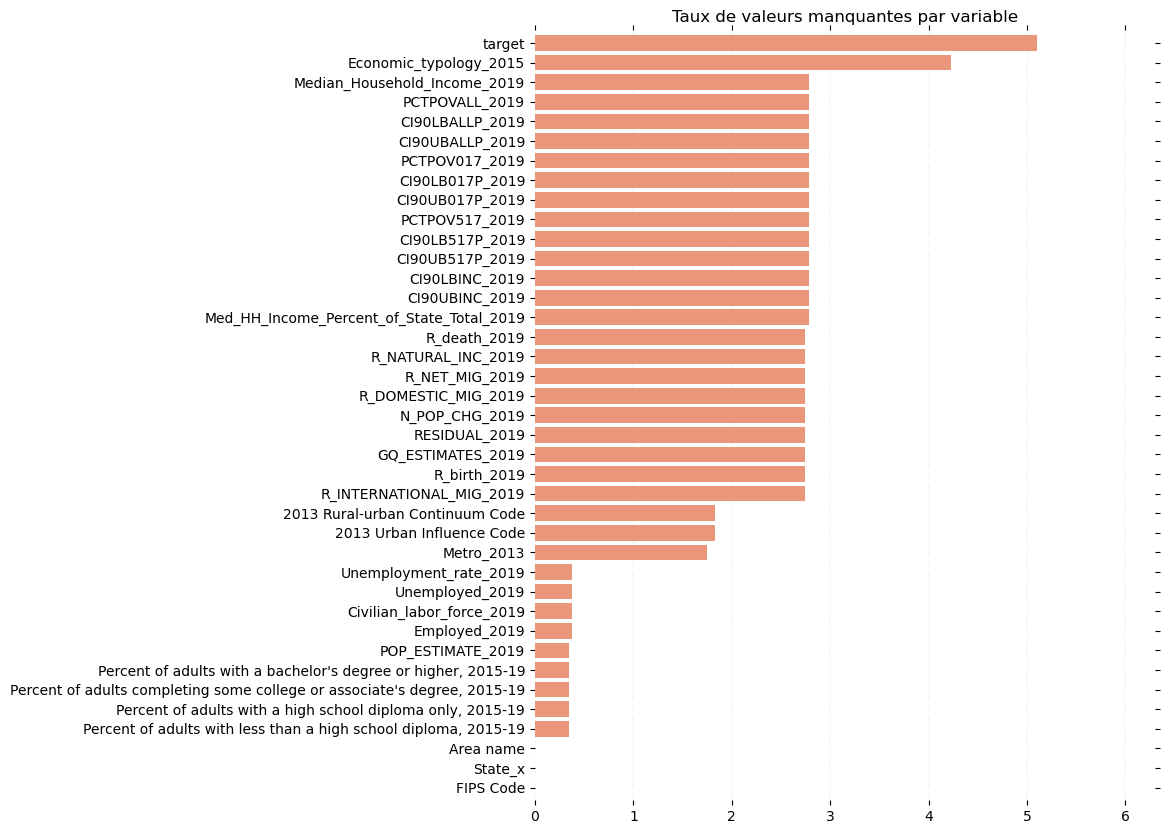

In [40]:
# Histogramme des taux de valeurs manquantes par variable

size = df_2019_pct_train.shape
nan_values = df_2019_pct_train.isna().sum()

nan_values = nan_values.sort_values(ascending=True)*100/size[0]

ax = nan_values.plot(kind='barh', 
                     figsize=(8, 10), 
                     color='#E9967A',
                     zorder=2,
                     width=0.8)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="both", 
               which="both", 
               bottom="off", 
               top="off", 
               labelbottom="on", 
               left="off", 
               right="off", 
               labelleft="on",
               labelsize=10)
ax.set_title("Taux de valeurs manquantes par variable")
vals = ax.get_xticks()

for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

<AxesSubplot:>

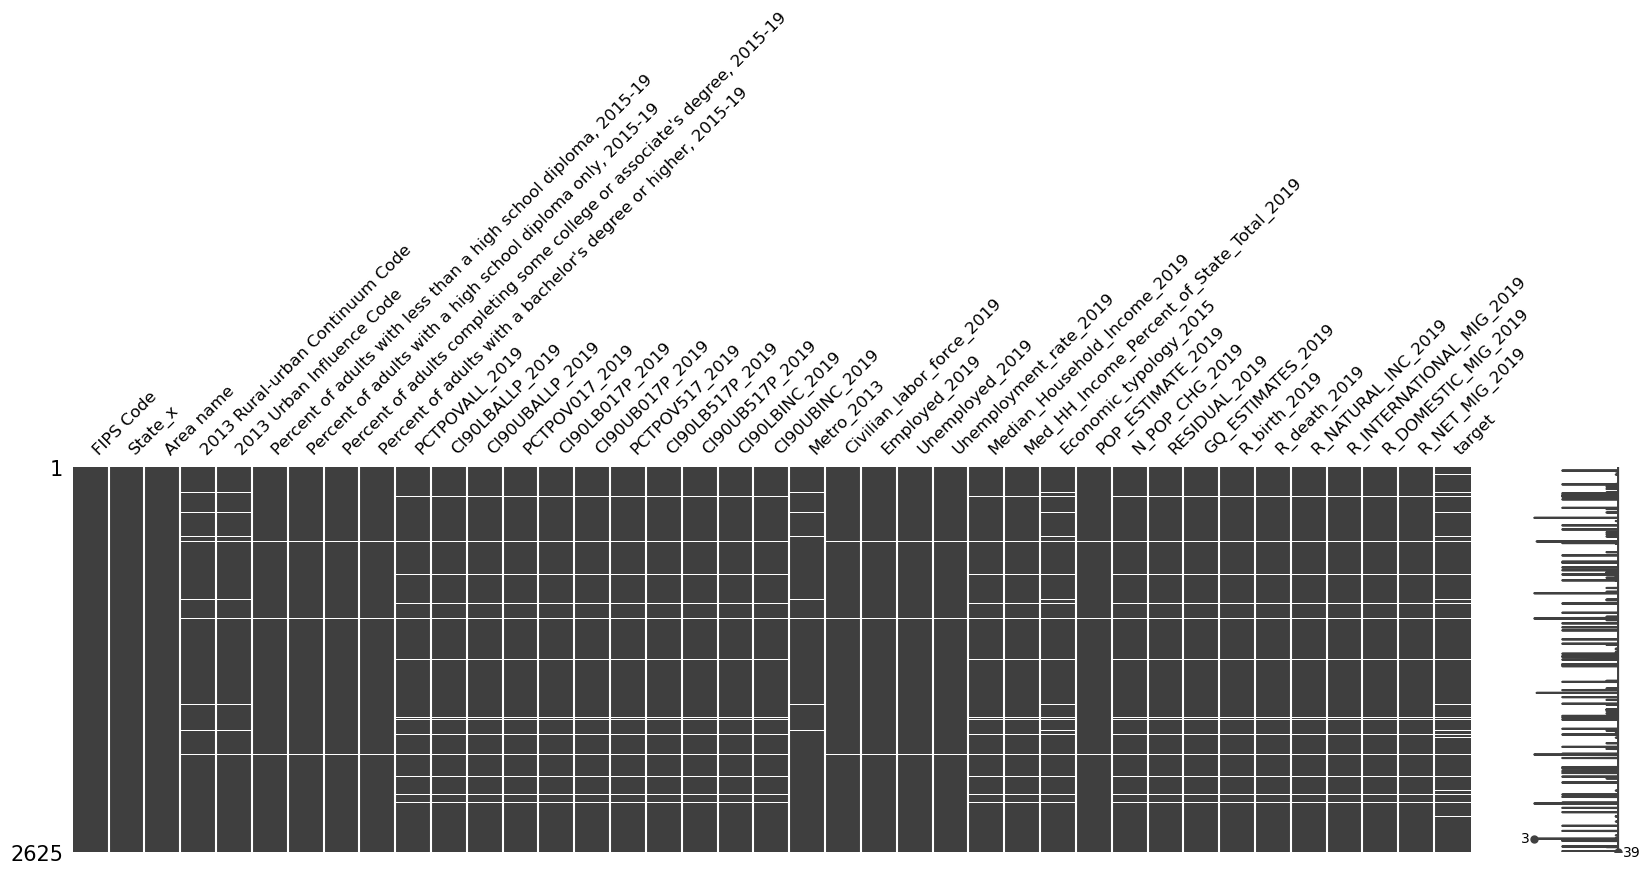

In [41]:
# Visualisation emplacements des valeurs manquantes
missingno.matrix(df_2019_pct_train, figsize = (20,5), fontsize=12)

In [42]:
df_2019_pct_train.tail()

,FIPS Code,State_x,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19",PCTPOVALL_2019,...,N_POP_CHG_2019,RESIDUAL_2019,GQ_ESTIMATES_2019,R_birth_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_DOMESTIC_MIG_2019,R_NET_MIG_2019,target
707,17181,IL,Union County,6.0,6.0,11.592545,35.423481,31.245913,21.738064,17.2,...,-179.0,1.0,566.0,10.332985,13.379125,-3.046140,0.000000,-7.704943,-7.704943,1.0
834,19043,IA,Clayton County,8.0,7.0,10.063734,43.213470,29.018806,17.703989,11.0,...,9.0,-1.0,257.0,10.145630,10.715609,-0.569979,0.512981,0.626977,1.139958,1.0
2396,45061,SC,Lee County,6.0,6.0,18.470867,41.481602,24.174383,15.873146,25.4,...,-466.0,3.0,1509.0,9.671180,15.942794,-6.271614,0.117226,-21.335209,-21.217983,0.0
483,13157,GA,Jackson County,4.0,3.0,15.940860,32.145584,29.216913,22.696644,10.3,...,2652.0,11.0,724.0,12.812103,8.569315,4.242788,0.362870,32.253562,32.616432,1.0
613,16083,ID,Twin Falls County,5.0,8.0,12.905554,27.173290,39.292259,20.628899,11.0,...,849.0,-2.0,964.0,13.822459,8.999057,4.823402,0.751849,4.268190,5.020040,1.0


In [43]:
# Suppression des données de Porto Rico car énormément de variables non remplies. 
# De plus ils n'ont actuellement pas le droit de vote à l'élection présidentielle américaine.

df_2019_pct_train2=df_2019_pct_train.drop(df_2019_pct_train[(df_2019_pct_train["State_x"]=='PR')].index)
df_2019_pct_train2.tail()

,FIPS Code,State_x,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19",PCTPOVALL_2019,...,N_POP_CHG_2019,RESIDUAL_2019,GQ_ESTIMATES_2019,R_birth_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_DOMESTIC_MIG_2019,R_NET_MIG_2019,target
707,17181,IL,Union County,6.0,6.0,11.592545,35.423481,31.245913,21.738064,17.2,...,-179.0,1.0,566.0,10.332985,13.379125,-3.046140,0.000000,-7.704943,-7.704943,1.0
834,19043,IA,Clayton County,8.0,7.0,10.063734,43.213470,29.018806,17.703989,11.0,...,9.0,-1.0,257.0,10.145630,10.715609,-0.569979,0.512981,0.626977,1.139958,1.0
2396,45061,SC,Lee County,6.0,6.0,18.470867,41.481602,24.174383,15.873146,25.4,...,-466.0,3.0,1509.0,9.671180,15.942794,-6.271614,0.117226,-21.335209,-21.217983,0.0
483,13157,GA,Jackson County,4.0,3.0,15.940860,32.145584,29.216913,22.696644,10.3,...,2652.0,11.0,724.0,12.812103,8.569315,4.242788,0.362870,32.253562,32.616432,1.0
613,16083,ID,Twin Falls County,5.0,8.0,12.905554,27.173290,39.292259,20.628899,11.0,...,849.0,-2.0,964.0,13.822459,8.999057,4.823402,0.751849,4.268190,5.020040,1.0


<AxesSubplot:>

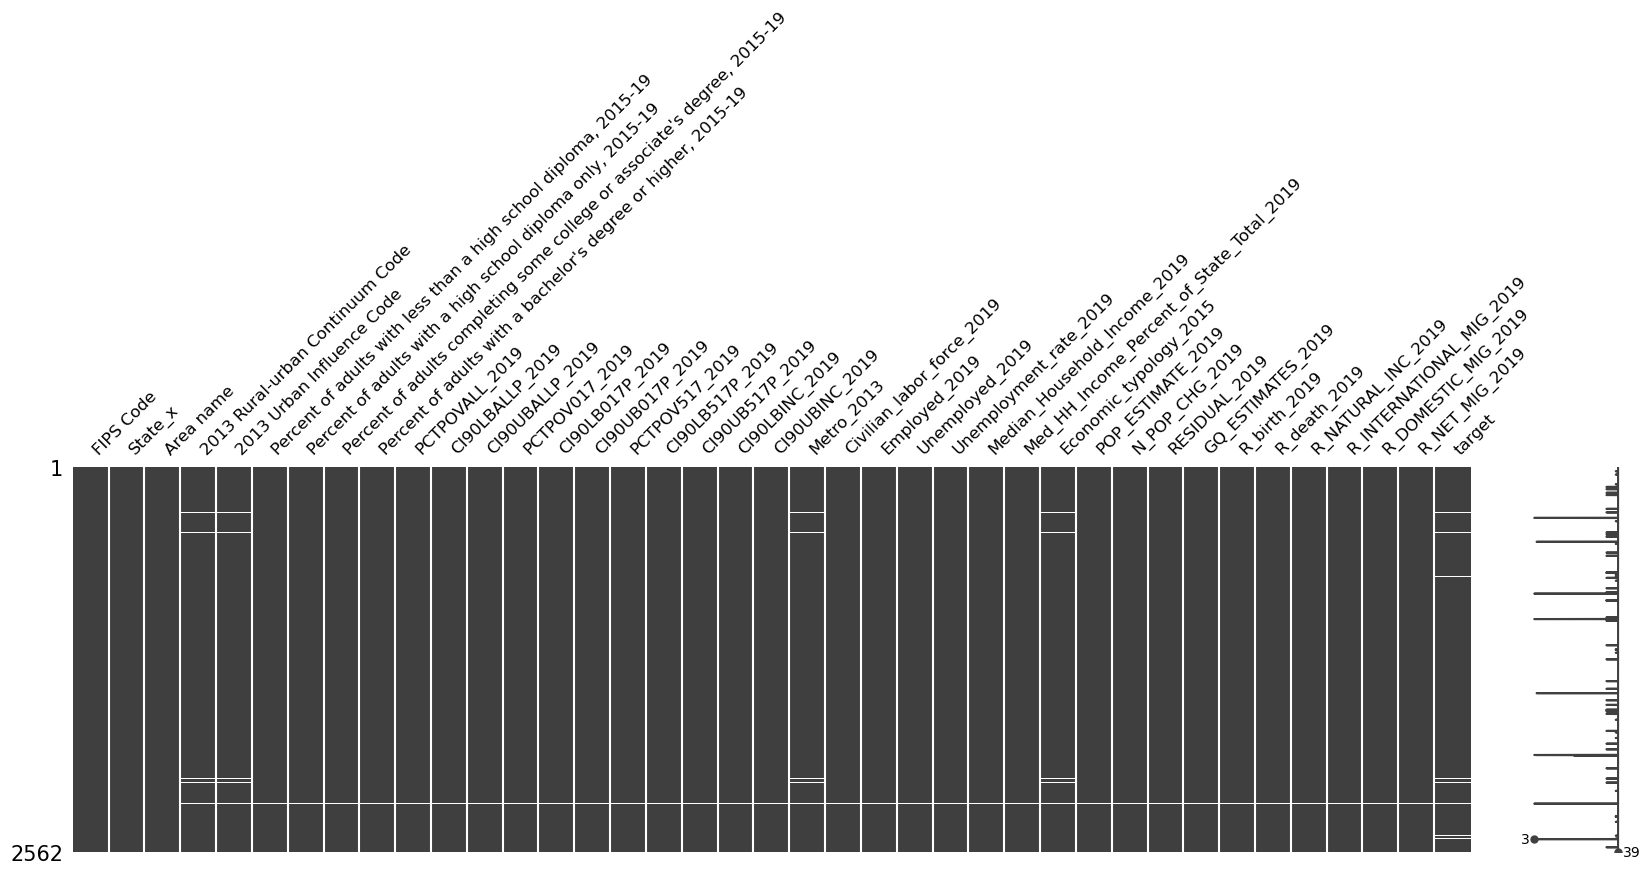

In [44]:
# Visualisation emplacements des valeurs manquantes
missingno.matrix(df_2019_pct_train2, figsize = (20,5), fontsize=12)

In [45]:
df_2019_pct_train2.isna().sum()

FIPS Code                                                                    0
State_x                                                                      0
Area name                                                                    0
2013 Rural-urban Continuum Code                                             48
2013 Urban Influence Code                                                   48
Percent of adults with less than a high school diploma, 2015-19              9
Percent of adults with a high school diploma only, 2015-19                   9
Percent of adults completing some college or associate's degree, 2015-19     9
Percent of adults with a bachelor's degree or higher, 2015-19                9
PCTPOVALL_2019                                                              10
CI90LBALLP_2019                                                             10
CI90UBALLP_2019                                                             10
PCTPOV017_2019                                      

In [46]:
# Counties non retrouvés dans le fichier des résultats élections 2020 (NAN dans variable 'target')
# --> Il s'agit des counties de l'Alaska et des lignes de regroupement à l'Etat 

df_2019_pct_train2[df_2019_pct_train2['target'].isna()].head(10)

,FIPS Code,State_x,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19",PCTPOVALL_2019,...,N_POP_CHG_2019,RESIDUAL_2019,GQ_ESTIMATES_2019,R_birth_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_DOMESTIC_MIG_2019,R_NET_MIG_2019,target
92,2195,AK,Petersburg Census Area,9.0,11.0,10.341685,31.708427,29.567198,28.382689,6.7,...,22.0,0.0,43.0,9.216590,8.909370,0.307220,0.614439,5.837174,6.451613,NaN
99,2240,AK,Southeast Fairbanks Census Area,9.0,12.0,10.137229,34.218681,35.945110,19.698982,12.0,...,-44.0,-1.0,369.0,15.762834,5.061461,10.701374,1.735358,-18.655098,-16.919740,NaN
104,2282,AK,Yakutat City and Borough,9.0,12.0,8.823529,33.484161,35.067875,22.624434,14.7,...,-17.0,1.0,18.0,6.808511,1.702128,5.106383,1.702128,-37.446809,-35.744681,NaN
3051,54000,WV,West Virginia,NaN,NaN,13.097753,40.320034,25.967607,20.614605,16.2,...,-12144.0,-43.0,46910.0,9.947620,12.549639,-2.602019,-0.194081,-3.933336,-4.127417,NaN
1221,24000,MD,Maryland,NaN,NaN,9.796140,24.611042,25.420776,40.172043,9.1,...,9878.0,-106.0,140499.0,11.603047,8.517664,3.085383,2.484960,-3.917566,-1.432606,NaN
2875,51000,VA,Virginia,NaN,NaN,10.305691,23.953545,26.959316,38.781448,9.9,...,34233.0,-174.0,244897.0,11.551814,8.185690,3.366124,1.745515,-1.072502,0.673014,NaN
95,2220,AK,Sitka City and Borough,7.0,11.0,5.287992,27.383665,33.957047,33.371300,8.1,...,-61.0,0.0,258.0,9.033848,6.804716,2.229131,1.877163,-11.262979,-9.385816,NaN
2254,41000,OR,Oregon,NaN,NaN,9.287846,22.735300,34.312252,33.664604,11.5,...,35851.0,-7.0,89211.0,10.311177,8.705867,1.605310,0.784559,6.148133,6.932692,NaN
1345,27000,MN,Minnesota,NaN,NaN,6.859513,24.647589,32.411053,36.081844,8.9,...,33383.0,-237.0,130567.0,12.029649,7.682813,4.346836,1.620682,0.011560,1.632242,NaN
1932,37000,NC,North Carolina,NaN,NaN,12.219548,25.652466,30.872301,31.255686,13.6,...,106469.0,56.0,280891.0,11.423548,9.038175,2.385372,1.359291,6.453184,7.812475,NaN


In [47]:
# Exemple des lignes regroupement de counties au niveau de l'Etat, non retrouvés dans le fichier des résultats élections 2020 (NAN dans variable 'target')
df_2019_pct_train2[(df_2019_pct_train2['target'].isna()) & (df_2019_pct_train2['State_x'] != "AK")].head()

,FIPS Code,State_x,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19",PCTPOVALL_2019,...,N_POP_CHG_2019,RESIDUAL_2019,GQ_ESTIMATES_2019,R_birth_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_DOMESTIC_MIG_2019,R_NET_MIG_2019,target
3051,54000,WV,West Virginia,NaN,NaN,13.097753,40.320034,25.967607,20.614605,16.2,...,-12144.0,-43.0,46910.0,9.947620,12.549639,-2.602019,-0.194081,-3.933336,-4.127417,NaN
1221,24000,MD,Maryland,NaN,NaN,9.796140,24.611042,25.420776,40.172043,9.1,...,9878.0,-106.0,140499.0,11.603047,8.517664,3.085383,2.484960,-3.917566,-1.432606,NaN
2875,51000,VA,Virginia,NaN,NaN,10.305691,23.953545,26.959316,38.781448,9.9,...,34233.0,-174.0,244897.0,11.551814,8.185690,3.366124,1.745515,-1.072502,0.673014,NaN
2254,41000,OR,Oregon,NaN,NaN,9.287846,22.735300,34.312252,33.664604,11.5,...,35851.0,-7.0,89211.0,10.311177,8.705867,1.605310,0.784559,6.148133,6.932692,NaN
1345,27000,MN,Minnesota,NaN,NaN,6.859513,24.647589,32.411053,36.081844,8.9,...,33383.0,-237.0,130567.0,12.029649,7.682813,4.346836,1.620682,0.011560,1.632242,NaN


In [48]:
# visualisation des counties d'Alaska dans le fichier des résultats d'élections 2020 --> les county_fips et county_name ne correspondent pas du tout à ceux des fichiers de données démographiques
df_2020results[df_2020results['state_name']== 'Alaska'].head()

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,winner2020,target
67,Alaska,2901,District 1,3511,3477,7360,34,0.477038,0.472418,0.004620,gop,1
68,Alaska,2902,District 2,3674,2104,6161,1570,0.596332,0.341503,0.254829,gop,1
69,Alaska,2903,District 3,6076,1903,8385,4173,0.724627,0.226953,0.497674,gop,1
70,Alaska,2904,District 4,4690,5345,10587,-655,0.442996,0.504864,-0.061868,dem,0
71,Alaska,2905,District 5,4077,4204,8706,-127,0.468298,0.482885,-0.014588,dem,0


In [49]:
# Suppression de toutes les lignes target = NAN (counties d'Alaska et lignes de regroupement niveau Etat)
df_target_clean_train = df_2019_pct_train2.drop(df_2019_pct_train2[(df_2019_pct_train2["target"].isna())].index)

In [50]:
df_target_clean_train.reset_index(drop=True, inplace=True)

In [51]:
df_target_clean_train.shape

(2491, 39)

In [52]:
df_target_clean_train.head()

,FIPS Code,State_x,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19",PCTPOVALL_2019,...,N_POP_CHG_2019,RESIDUAL_2019,GQ_ESTIMATES_2019,R_birth_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_DOMESTIC_MIG_2019,R_NET_MIG_2019,target
0,39061,OH,Hamilton County,1.0,1.0,8.628272,26.287451,27.164076,37.920200,14.6,...,2028.0,-35.0,23838.0,13.069854,9.636736,3.433118,1.311762,-2.218115,-0.906353,0.0
1,28083,MS,Leflore County,5.0,8.0,18.378925,38.162109,24.978935,18.480032,35.7,...,-433.0,1.0,1207.0,14.507298,12.781915,1.725382,-0.176059,-16.831282,-17.007342,0.0
2,37087,NC,Haywood County,2.0,2.0,11.997293,26.363478,35.651283,25.987947,10.6,...,427.0,-1.0,683.0,9.451963,12.334248,-2.882285,-0.370349,10.144356,9.774006,1.0
3,20029,KS,Cloud County,7.0,9.0,7.048825,31.561407,37.427097,23.962673,13.5,...,52.0,-1.0,498.0,11.187215,14.155251,-2.968037,0.570776,8.447489,9.018265,1.0
4,38013,ND,Burke County,9.0,10.0,7.409880,27.770361,42.056076,22.763685,8.8,...,21.0,0.0,2.0,12.354478,8.077928,4.276550,0.000000,5.702067,5.702067,1.0


<AxesSubplot:>

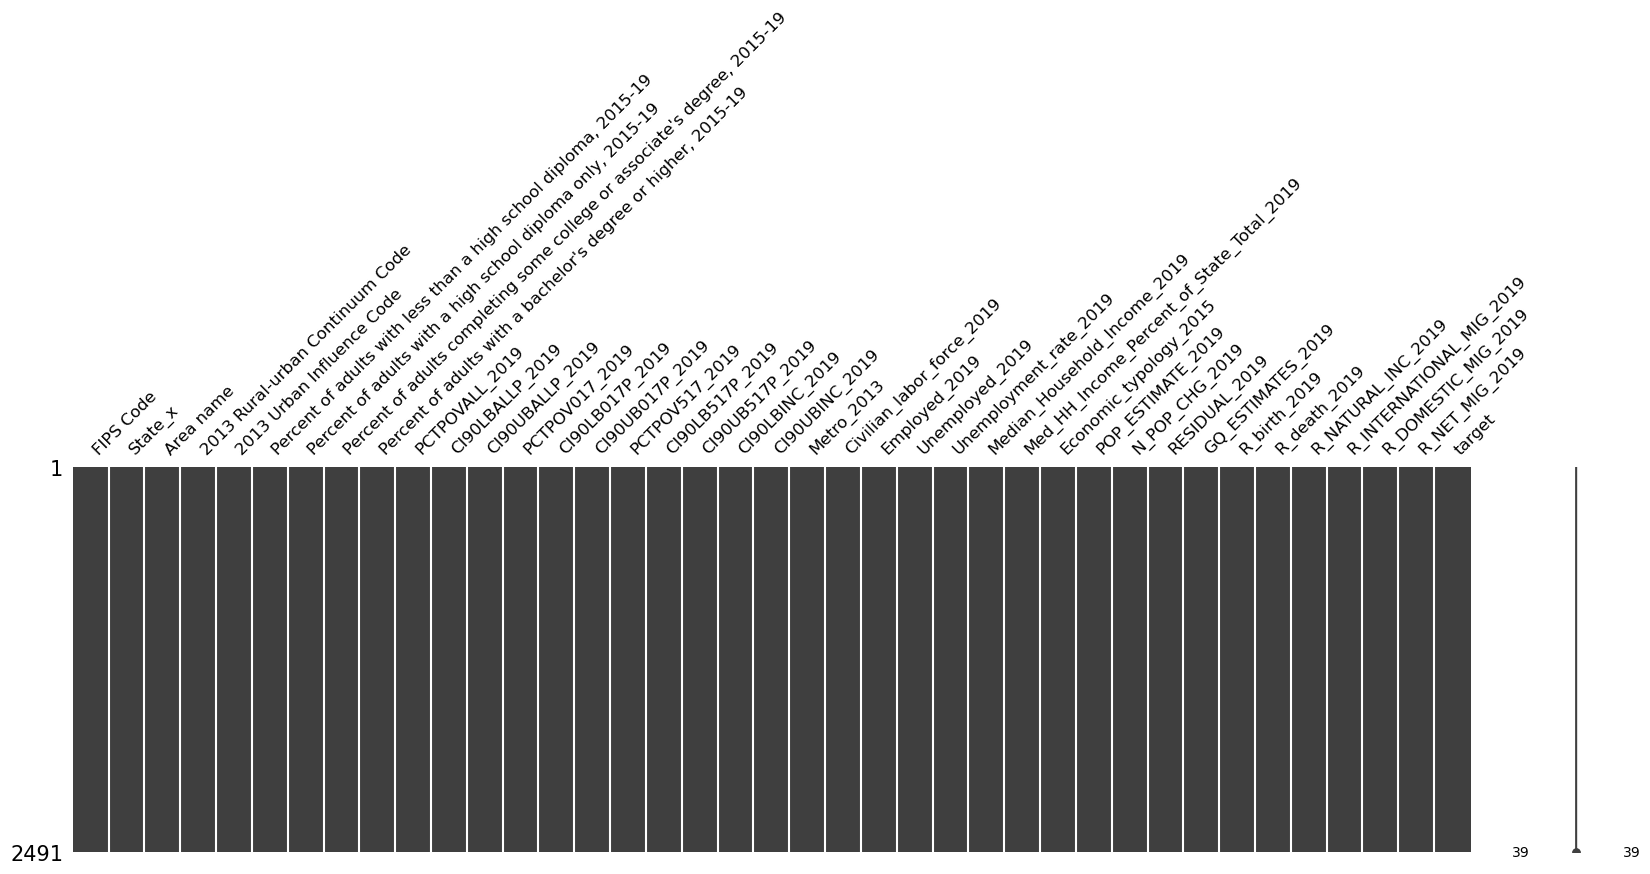

In [53]:
# Visualisation emplacements des valeurs manquantes
missingno.matrix(df_target_clean_train, figsize = (20,5), fontsize=12)

In [54]:
df_target_clean_train.isna().sum()

FIPS Code                                                                   0
State_x                                                                     0
Area name                                                                   0
2013 Rural-urban Continuum Code                                             0
2013 Urban Influence Code                                                   0
Percent of adults with less than a high school diploma, 2015-19             0
Percent of adults with a high school diploma only, 2015-19                  0
Percent of adults completing some college or associate's degree, 2015-19    0
Percent of adults with a bachelor's degree or higher, 2015-19               0
PCTPOVALL_2019                                                              0
CI90LBALLP_2019                                                             0
CI90UBALLP_2019                                                             0
PCTPOV017_2019                                                  

#### <span style="color:#191970">Export CSV df_target_clean</span>

In [55]:
df_target_clean_train.to_csv('./df_target_clean_train.csv', index=False)

#### <span style="color:#191970">Recherche de valeurs aberrantes</span>

Text(0, 0.5, '')

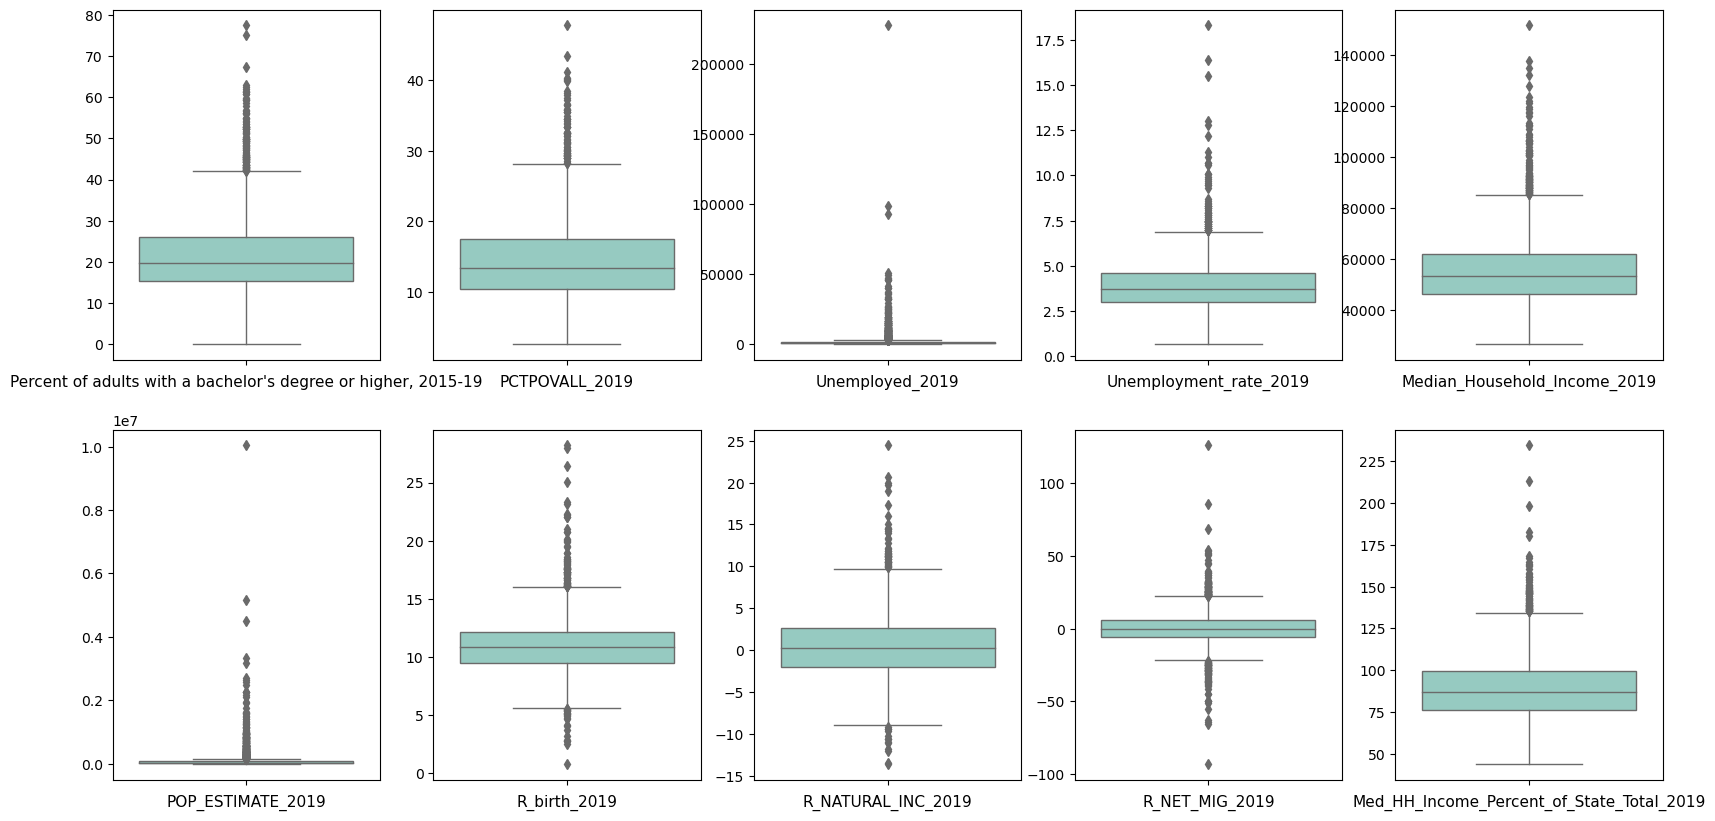

In [56]:
#Boxplots 

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

ax1=sns.boxplot(data = df_target_clean_train, y = "Percent of adults with a bachelor's degree or higher, 2015-19", linewidth = 1 , palette = 'Set3', ax=axes[0,0])
ax1.set_xlabel("Percent of adults with a bachelor's degree or higher, 2015-19", fontsize=11)
ax1.set_ylabel('')

ax2=sns.boxplot(data = df_target_clean_train, y = "PCTPOVALL_2019", linewidth = 1 , palette = 'Set3', ax=axes[0,1])
ax2.set_xlabel('PCTPOVALL_2019', fontsize=11)
ax2.set_ylabel('')

ax10=sns.boxplot(data = df_target_clean_train, y = "Unemployed_2019", linewidth = 1 , palette = 'Set3', ax=axes[0,2])
ax10.set_xlabel('Unemployed_2019', fontsize=11)
ax10.set_ylabel('')

ax3=sns.boxplot(data = df_target_clean_train, y = "Unemployment_rate_2019", linewidth = 1 , palette = 'Set3', ax=axes[0,3])
ax3.set_xlabel('Unemployment_rate_2019', fontsize=11)
ax3.set_ylabel('')

ax4=sns.boxplot(data = df_target_clean_train, y = "Median_Household_Income_2019", linewidth = 1 , palette = 'Set3', ax=axes[0,4])
ax4.set_xlabel('Median_Household_Income_2019', fontsize=11)
ax4.set_ylabel('')

ax5=sns.boxplot(data = df_target_clean_train, y = "POP_ESTIMATE_2019", linewidth = 1 , palette = 'Set3', ax=axes[1,0])
ax5.set_xlabel('POP_ESTIMATE_2019', fontsize=11)
ax5.set_ylabel('')

ax6=sns.boxplot(data = df_target_clean_train, y = "R_birth_2019", linewidth = 1 , palette = 'Set3', ax=axes[1,1])
ax6.set_xlabel('R_birth_2019', fontsize=11)
ax6.set_ylabel('')

ax7=sns.boxplot(data = df_target_clean_train, y = "R_NATURAL_INC_2019", linewidth = 1 , palette = 'Set3', ax=axes[1,2])
ax7.set_xlabel('R_NATURAL_INC_2019', fontsize=11)
ax7.set_ylabel('')

ax8=sns.boxplot(data = df_target_clean_train, y = "R_NET_MIG_2019", linewidth = 1 , palette = 'Set3', ax=axes[1,3])
ax8.set_xlabel('R_NET_MIG_2019', fontsize=11)
ax8.set_ylabel('')

ax10=sns.boxplot(data = df_target_clean_train, y = "Med_HH_Income_Percent_of_State_Total_2019", linewidth = 1 , palette = 'Set3', ax=axes[1,4])
ax10.set_xlabel('Med_HH_Income_Percent_of_State_Total_2019', fontsize=11)
ax10.set_ylabel('')

In [57]:
df_target_clean_train[df_target_clean_train["Unemployed_2019"]>80000].head()

,FIPS Code,State_x,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19",PCTPOVALL_2019,...,N_POP_CHG_2019,RESIDUAL_2019,GQ_ESTIMATES_2019,R_birth_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_DOMESTIC_MIG_2019,R_NET_MIG_2019,target
1050,17031,IL,Cook County,1.0,1.0,12.874431,23.120096,25.190546,38.814926,13.0,...,-21727.0,56.0,90978.0,11.978462,8.221509,3.756954,2.254753,-10.232322,-7.977568,0.0
1359,4013,AZ,Maricopa County,1.0,1.0,12.274148,22.393623,32.634155,32.698071,12.2,...,83011.0,315.0,67191.0,11.863881,7.431071,4.432810,1.242150,12.933885,14.176034,0.0
1945,6037,CA,Los Angeles County,1.0,1.0,20.866573,20.610870,25.981346,32.541210,13.4,...,-34799.0,160.0,179406.0,11.232827,6.778099,4.454728,2.093172,-10.024157,-7.930985,0.0


In [58]:
df_target_clean_train[df_target_clean_train["POP_ESTIMATE_2019"]>3000000].head()

,FIPS Code,State_x,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19",PCTPOVALL_2019,...,N_POP_CHG_2019,RESIDUAL_2019,GQ_ESTIMATES_2019,R_birth_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_DOMESTIC_MIG_2019,R_NET_MIG_2019,target
445,6059,CA,Orange County,1.0,1.0,14.528754,17.222048,27.662764,40.586433,9.5,...,-281.0,11.0,43984.0,11.463451,6.775546,4.687905,1.945317,-6.725166,-4.779849,0.0
1050,17031,IL,Cook County,1.0,1.0,12.874431,23.120096,25.190546,38.814926,13.0,...,-21727.0,56.0,90978.0,11.978462,8.221509,3.756954,2.254753,-10.232322,-7.977568,0.0
1262,6073,CA,San Diego County,1.0,1.0,12.553843,18.232809,30.408342,38.805004,10.3,...,4469.0,-84.0,107139.0,12.170815,6.909874,5.260941,2.018228,-5.914399,-3.896171,0.0
1359,4013,AZ,Maricopa County,1.0,1.0,12.274148,22.393623,32.634155,32.698071,12.2,...,83011.0,315.0,67191.0,11.863881,7.431071,4.432810,1.242150,12.933885,14.176034,0.0
1945,6037,CA,Los Angeles County,1.0,1.0,20.866573,20.610870,25.981346,32.541210,13.4,...,-34799.0,160.0,179406.0,11.232827,6.778099,4.454728,2.093172,-10.024157,-7.930985,0.0


In [59]:
df_target_clean_train[df_target_clean_train["Unemployment_rate_2019"]>14.0].head()

,FIPS Code,State_x,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19",PCTPOVALL_2019,...,N_POP_CHG_2019,RESIDUAL_2019,GQ_ESTIMATES_2019,R_birth_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_DOMESTIC_MIG_2019,R_NET_MIG_2019,target
226,4027,AZ,Yuma County,3.0,2.0,26.746960,25.707840,32.519093,15.026110,20.4,...,2175.0,-6.0,9459.0,14.062092,8.053616,6.008477,2.567002,1.678424,4.245426,1.0
1424,6025,CA,Imperial County,3.0,2.0,30.271055,24.319637,30.190239,15.219069,22.0,...,-308.0,10.0,8745.0,15.041159,5.949197,9.091962,0.181950,-11.027243,-10.845293,0.0
1748,28063,MS,Jefferson County,8.0,7.0,22.037037,37.880657,24.176954,15.905350,28.9,...,-103.0,0.0,357.0,11.503231,11.361216,0.142015,0.000000,-14.769580,-14.769580,0.0


Quelques valeurs qui se détachent des autres mais ceci est lié aux disparités typiques du territoire américain, tant en terme d'étendue géographique, qu'en terme de répartition de la population ou de richesses. 

### <span style="color:#191970">2.2. Statistiques</span>

#### <span style="color:#191970">Statistiques générales</span>

In [60]:
df_target_clean_train.describe(include=[np.number])

,FIPS Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19",PCTPOVALL_2019,CI90LBALLP_2019,CI90UBALLP_2019,...,N_POP_CHG_2019,RESIDUAL_2019,GQ_ESTIMATES_2019,R_birth_2019,R_death_2019,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2019,R_DOMESTIC_MIG_2019,R_NET_MIG_2019,target
count,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,...,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000
mean,30667.252910,4.995584,5.223605,13.065966,34.123165,30.795102,22.015767,14.467202,11.541911,17.392493,...,487.976315,-0.026094,2635.139703,10.942184,10.430123,0.512061,0.628876,-0.263855,0.365022,0.824568
std,14993.729106,2.714305,3.475471,6.243399,7.255207,5.234374,9.656537,5.849894,4.732137,7.062026,...,3105.791368,13.818405,7087.192708,2.398201,2.637433,3.919867,1.361221,12.284077,12.121228,0.380412
min,1001.000000,1.000000,1.000000,1.116910,7.265136,5.235602,0.000000,2.700000,2.200000,3.200000,...,-34799.000000,-143.000000,0.000000,0.795545,0.000000,-13.540491,-1.735609,-114.149822,-92.746730,0.000000
25%,19036.000000,2.000000,2.000000,8.498835,29.683480,27.263552,15.317287,10.400000,8.100000,12.450000,...,-97.000000,-2.000000,174.000000,9.498352,8.784549,-2.012812,0.000000,-5.963392,-5.389362,1.000000
50%,29209.000000,6.000000,5.000000,11.778804,34.485962,30.861397,19.637682,13.400000,10.700000,16.100000,...,5.000000,-1.000000,608.000000,10.873440,10.515845,0.258717,0.214385,-0.802099,-0.138018,1.000000
75%,46013.000000,7.000000,8.000000,16.704980,39.112930,34.231028,26.039326,17.500000,14.000000,20.900000,...,230.500000,1.000000,2285.500000,12.120104,12.201666,2.681133,0.755002,5.394925,5.877149,1.000000
max,56045.000000,9.000000,12.000000,73.560211,57.433674,60.563381,77.557411,47.700000,38.400000,57.000000,...,83011.000000,315.000000,179406.000000,28.192024,19.343631,24.429062,21.403092,126.182965,126.182965,1.000000


#### <span style="color:#191970">Répartition des résultats d'élections</span>

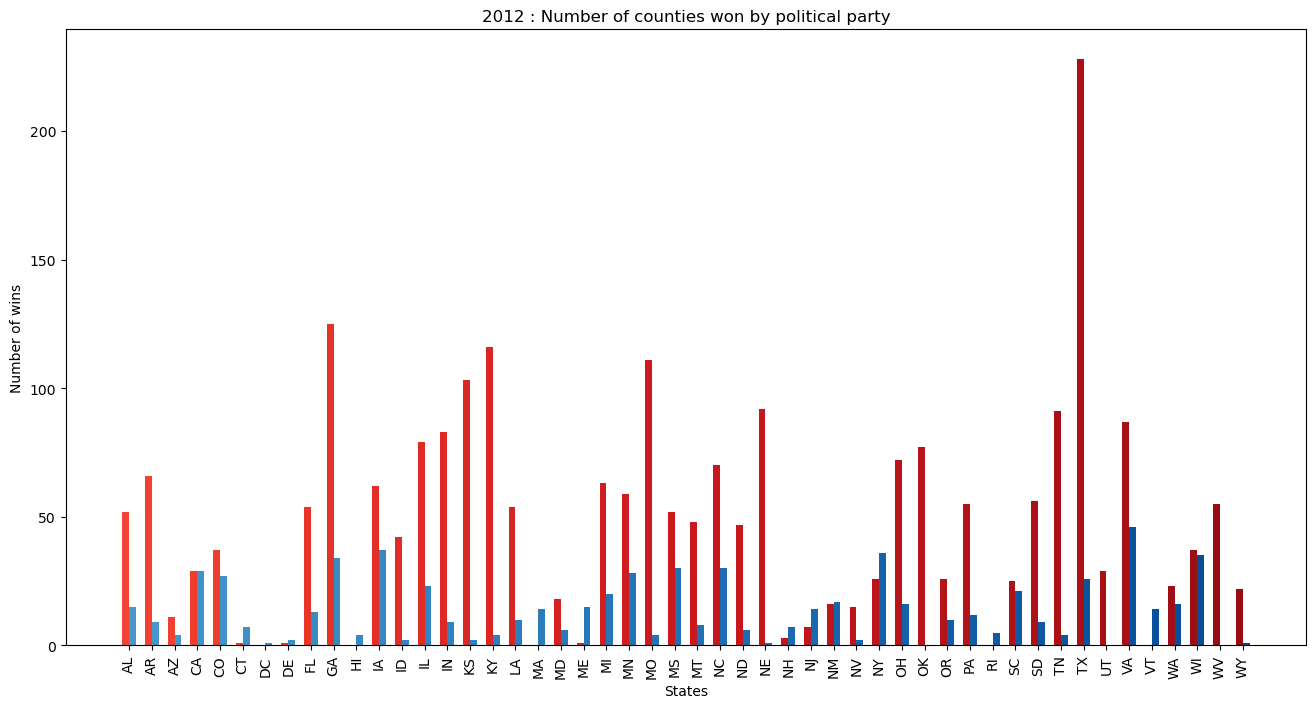

In [61]:
# Nombre de victoires par parti (Rep/GOP), par Etat en 2012

color_1 = plt.cm.Reds(np.linspace(0.6, 1, 66))
color_2 = plt.cm.Blues(np.linspace(0.6, 1, 66))

# Rep:target=1 (donc sum de target = nb de victoires des Rep)
# GOP:target=0. 'FIPS Code'= donne le nombre total de county par Etat (donc total - victoires Rep = victoire des GOP)
states2012 = df_2008_2016results.groupby('State').agg({'fips_code':'count','target2012':'sum'}).sort_values(by='State',ascending=True)
states2012['GOP wins 2012'] = states2012['fips_code'] - states2012['target2012']

data1_2012 = states2012['target2012']
data2_2012 = states2012['GOP wins 2012']

plt.figure(figsize=(16,8))
x = np.arange(50)
ax1 = plt.subplot(1,1,1)
w = 0.3

color = color_1
plt.title('2012 : Number of counties won by political party')
plt.xticks(x + w /2, data1_2012.index, rotation=90)
ax1.set_xlabel('States')
ax1.set_ylabel('Number of wins')
ax1.bar(x,data1_2012.values,color=color_1,width=w,align='center')

color = color_2
ax2 = ax1
ax2.bar(x + w,data2_2012, color=color_2,width=w,align='center')

plt.show()

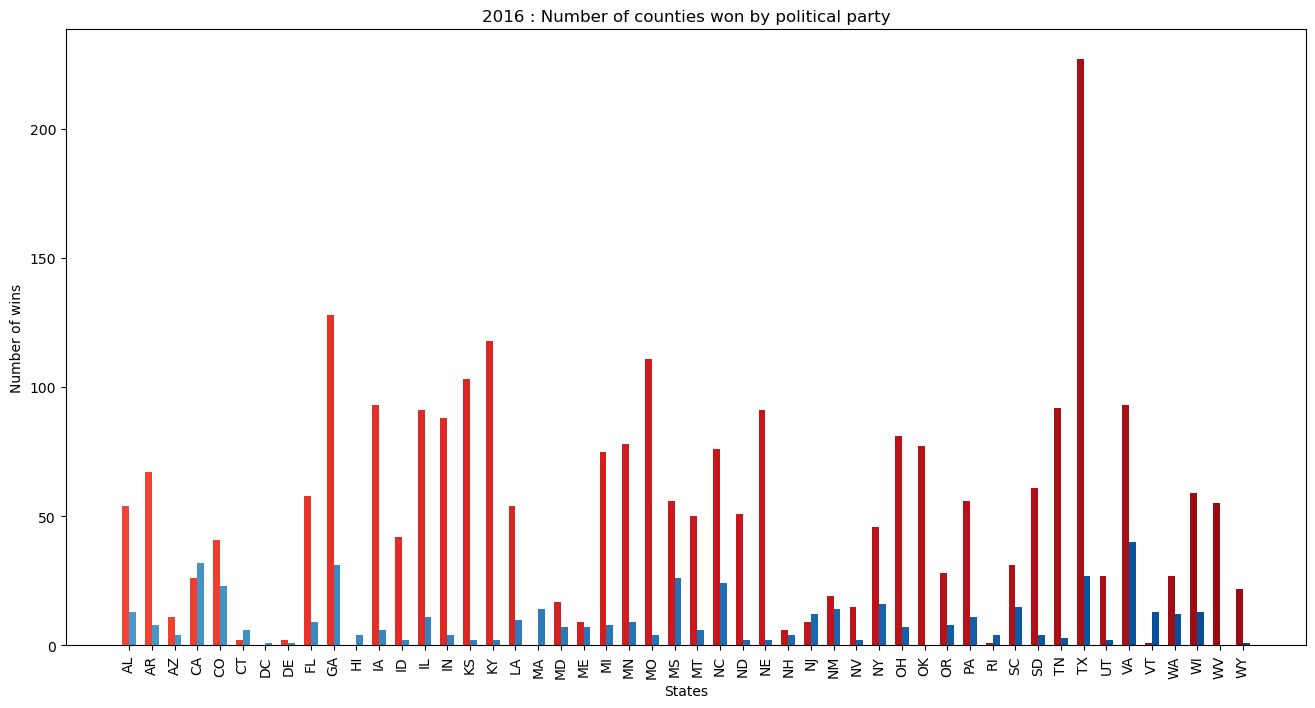

In [62]:
# Nombre de victoires par parti (Rep/GOP), par Etat en 2016

color_1 = plt.cm.Reds(np.linspace(0.6, 1, 66))
color_2 = plt.cm.Blues(np.linspace(0.6, 1, 66))

# Rep:target=1 (donc sum de target = nb de victoires des Rep)
# GOP:target=0. 'FIPS Code'= donne le nombre total de county par Etat (donc total - victoires Rep = victoire des GOP)
states2016 = df_2008_2016results.groupby('State').agg({'fips_code':'count','target2016':'sum'}).sort_values(by='State',ascending=True)
states2016['GOP wins 2016'] = states2016['fips_code'] - states2016['target2016']

data1_2016 = states2016['target2016']
data2_2016 = states2016['GOP wins 2016']

plt.figure(figsize=(16,8))
x = np.arange(50)
ax1 = plt.subplot(1,1,1)
w = 0.3

color = color_1
plt.title('2016 : Number of counties won by political party')
plt.xticks(x + w /2, data1_2016.index, rotation=90)
ax1.set_xlabel('States')
ax1.set_ylabel('Number of wins')
ax1.bar(x,data1_2016.values,color=color_1,width=w,align='center')

color = color_2
ax2 = ax1
ax2.bar(x + w,data2_2016, color=color_2,width=w,align='center')

plt.show()

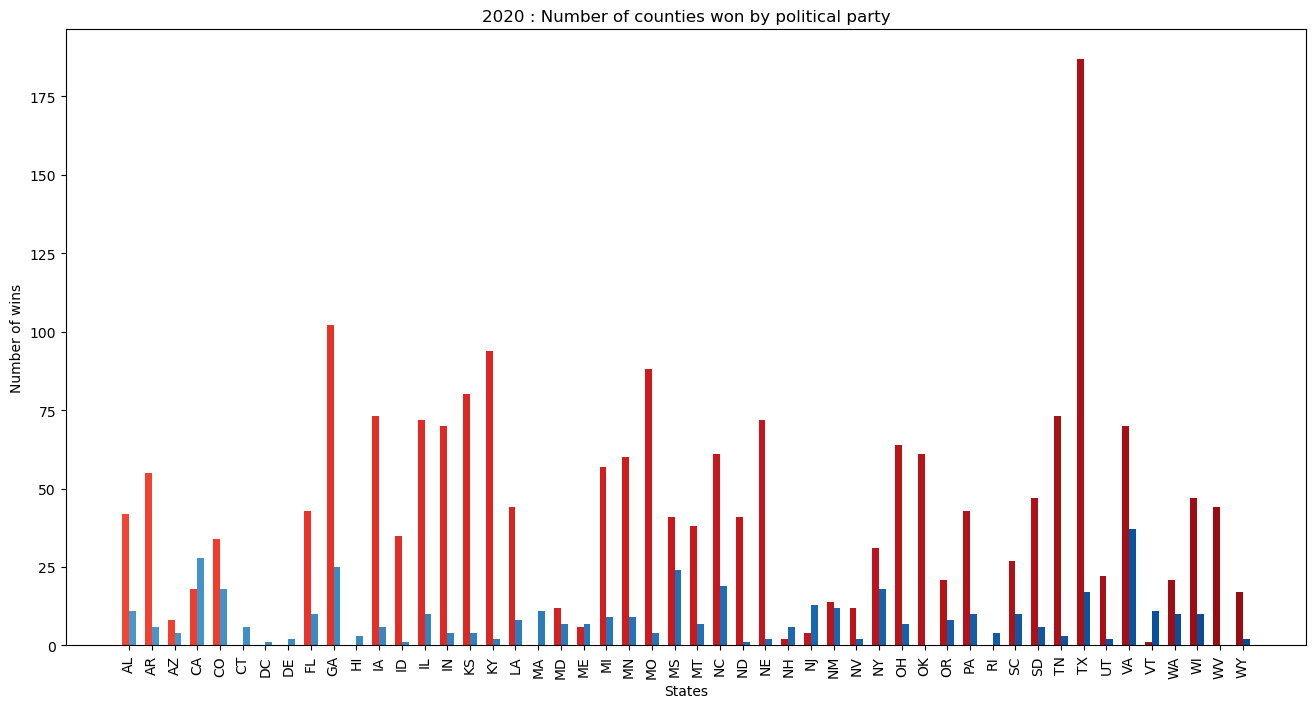

In [68]:
# Nombre de victoires par parti (Rep/GOP), par Etat en 2020

color_1 = plt.cm.Reds(np.linspace(0.6, 1, 66))
color_2 = plt.cm.Blues(np.linspace(0.6, 1, 66))

# Rep:target=1 (donc sum de target = nb de victoires des Rep)
# GOP:target=0. 'FIPS Code'= donne le nombre total de county par Etat (donc total - victoires Rep = victoire des GOP)
states = df_target_clean_train.groupby('State_x').agg({'FIPS Code':'count','target':'sum'}).sort_values(by='State_x',ascending=True)
states['GOP wins'] = states['FIPS Code'] - states['target']

data1 = states['target']
data2 = states['GOP wins']

plt.figure(figsize=(16,8))
x = np.arange(50)
ax1 = plt.subplot(1,1,1)
w = 0.3

color = color_1
plt.title('2020 : Number of counties won by political party')
plt.xticks(x + w /2, data1.index, rotation=90)
ax1.set_xlabel('States')
ax1.set_ylabel('Number of wins')
ax1.bar(x,data1.values,color=color_1,width=w,align='center')

color = color_2
ax2 = ax1
ax2.bar(x + w,data2, color=color_2,width=w,align='center')

plt.show()

#### <span style="color:#191970">Analyse des corrélations</span>

##### <span style="color:#191970">Données Education</span>

Text(0.5, 1.0, 'Matrice de corrélation de Pearson : Education_histo')

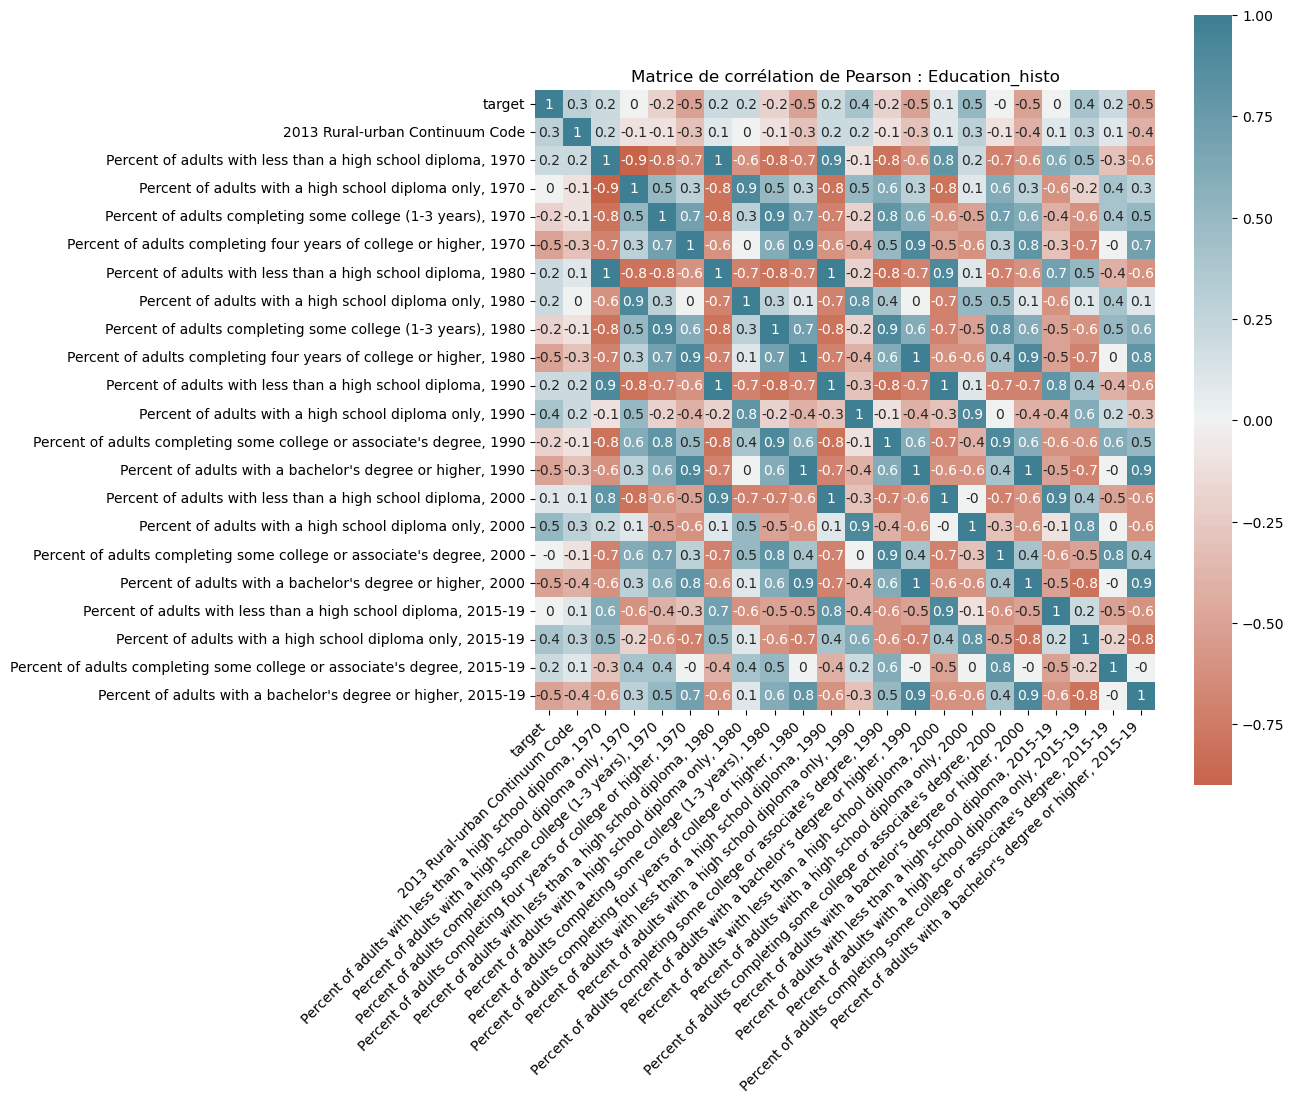

In [72]:
# Matrice de corrélation de Pearson : fichier education avec tout l'historique

matrice_corr = df[["target","2013 Rural-urban Continuum Code","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"]].corr().round(1)
plt.figure(figsize=(10,10))
ax = sns.heatmap(data=matrice_corr, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True,annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.title("Matrice de corrélation de Pearson : Education_histo")

##### <span style="color:#191970">Données PovertyEstimate</span>

Text(0.5, 1.0, 'Matrice de corrélation de Pearson - PovertyEstimate_2019')

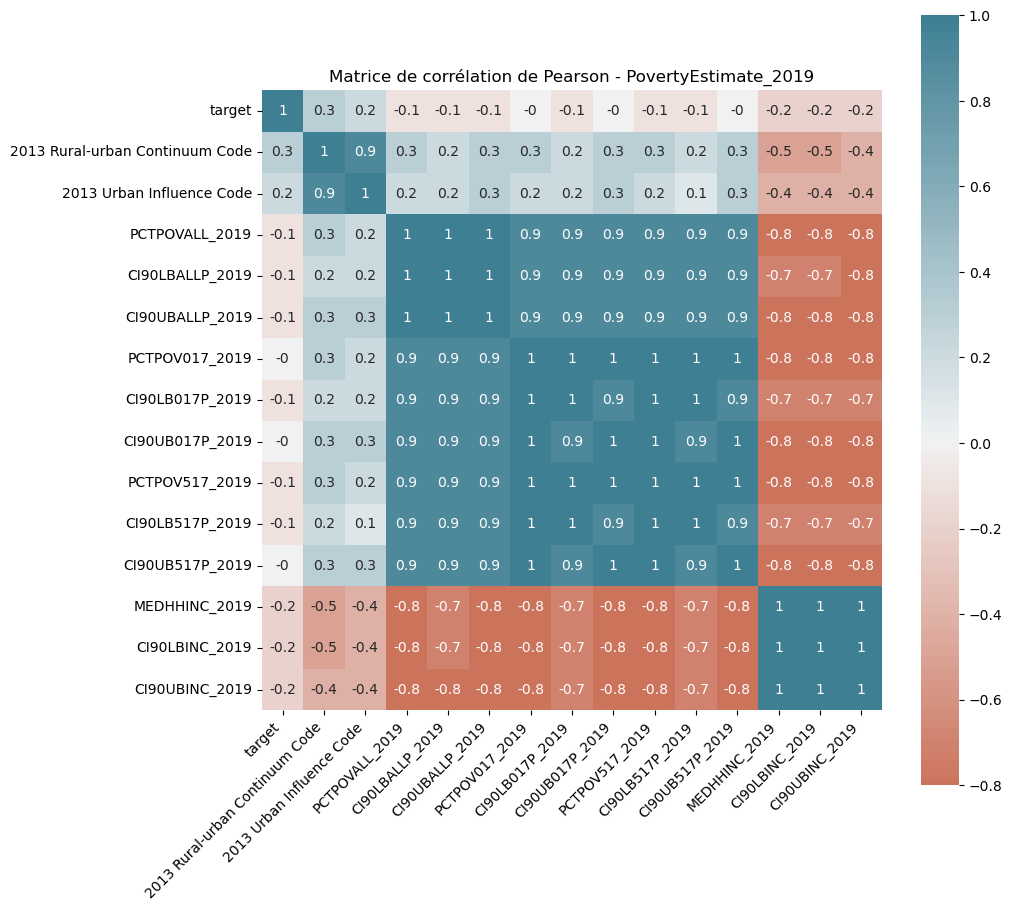

In [73]:
# Matrice de corrélation de Pearson : fichier PovertyEstimate - 2019

matrice_corr = df[['target',"2013 Rural-urban Continuum Code", "2013 Urban Influence Code", 'PCTPOVALL_2019','CI90LBALLP_2019','CI90UBALLP_2019','PCTPOV017_2019','CI90LB017P_2019','CI90UB017P_2019','PCTPOV517_2019','CI90LB517P_2019','CI90UB517P_2019', "MEDHHINC_2019", 'CI90LBINC_2019','CI90UBINC_2019']].corr().round(1)
plt.figure(figsize=(10,10))
ax = sns.heatmap(data=matrice_corr, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.title("Matrice de corrélation de Pearson - PovertyEstimate_2019")

Les variables "Rural-urban_Continuum_Code_2013" et "2013 Urban Influence Code" sont très corrélées. Nous conserverons la première car un peu plus corrélée avec la target.<br>
Toutes les données de pauvreté sont très corrélées entre elles. Nous n'allons conserver que la variable PCTPOVALL_2019 qui est la variable regroupant toutes les tranches d'âge ("Estimated percent of people of all ages in poverty 2019"). <br> 
Les variables MEDHHINC_2019, CI90LBINC_2019 et CI90UBINC_2019 sont des variables de revenus médian, qui apparaissent également dans le fichier Unemployement (celles que nous conserverons).

##### <span style="color:#191970">Données Unemployment</span>

Text(0.5, 1.0, 'Matrice de corrélation de Pearson - Unemployment_2019')

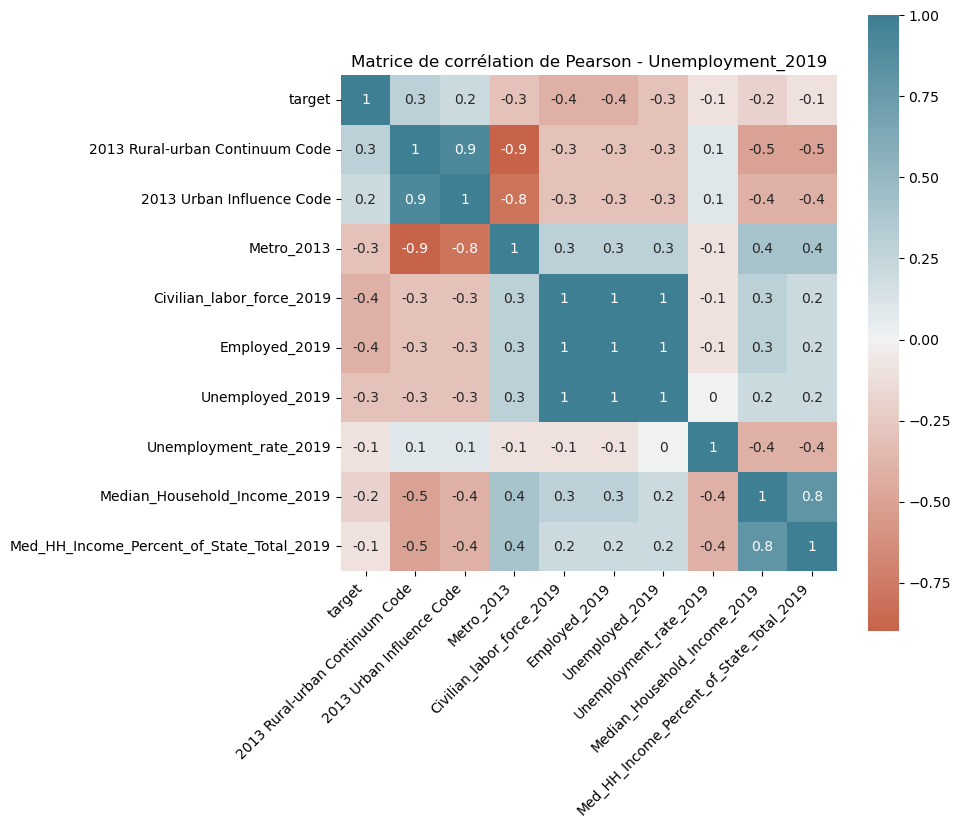

In [74]:
# Matrice de corrélation de Pearson : fichier Unemployment - données 2019

matrice_corr = df_target_clean_train[['target','2013 Rural-urban Continuum Code',"2013 Urban Influence Code", 'Metro_2013', 'Civilian_labor_force_2019', 'Employed_2019', 'Unemployed_2019', 'Unemployment_rate_2019', 'Median_Household_Income_2019', 'Med_HH_Income_Percent_of_State_Total_2019']].corr().round(1)
plt.figure(figsize=(8,8))
ax = sns.heatmap(data=matrice_corr, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.title("Matrice de corrélation de Pearson - Unemployment_2019")

Les variables "2013 Rural-urban Continuum Code", "2013 Urban Influence Code" et "Metro_2013" sont très corrélées. Nous conserverons la première car un peu plus corrélée avec la target.<br>
Les variables "Civilian_labor_force_2019", "Employed_2019" et "Unemployed_2019" sont complètement corrélées. En effet, "Civilian_labor_force_2019" = "Employed_2019" + "Unemployed_2019". <br>
Nous conserverons la variable "Unemployed_2019" pour avoir le nombre de personne sans emploi. <br>
Les deux variables de revenus médian sont corrélées à 0.8, nous garderons celle en %.

Text(0.5, 1.0, 'Matrice de corrélation de Pearson - Unemployment_histo')

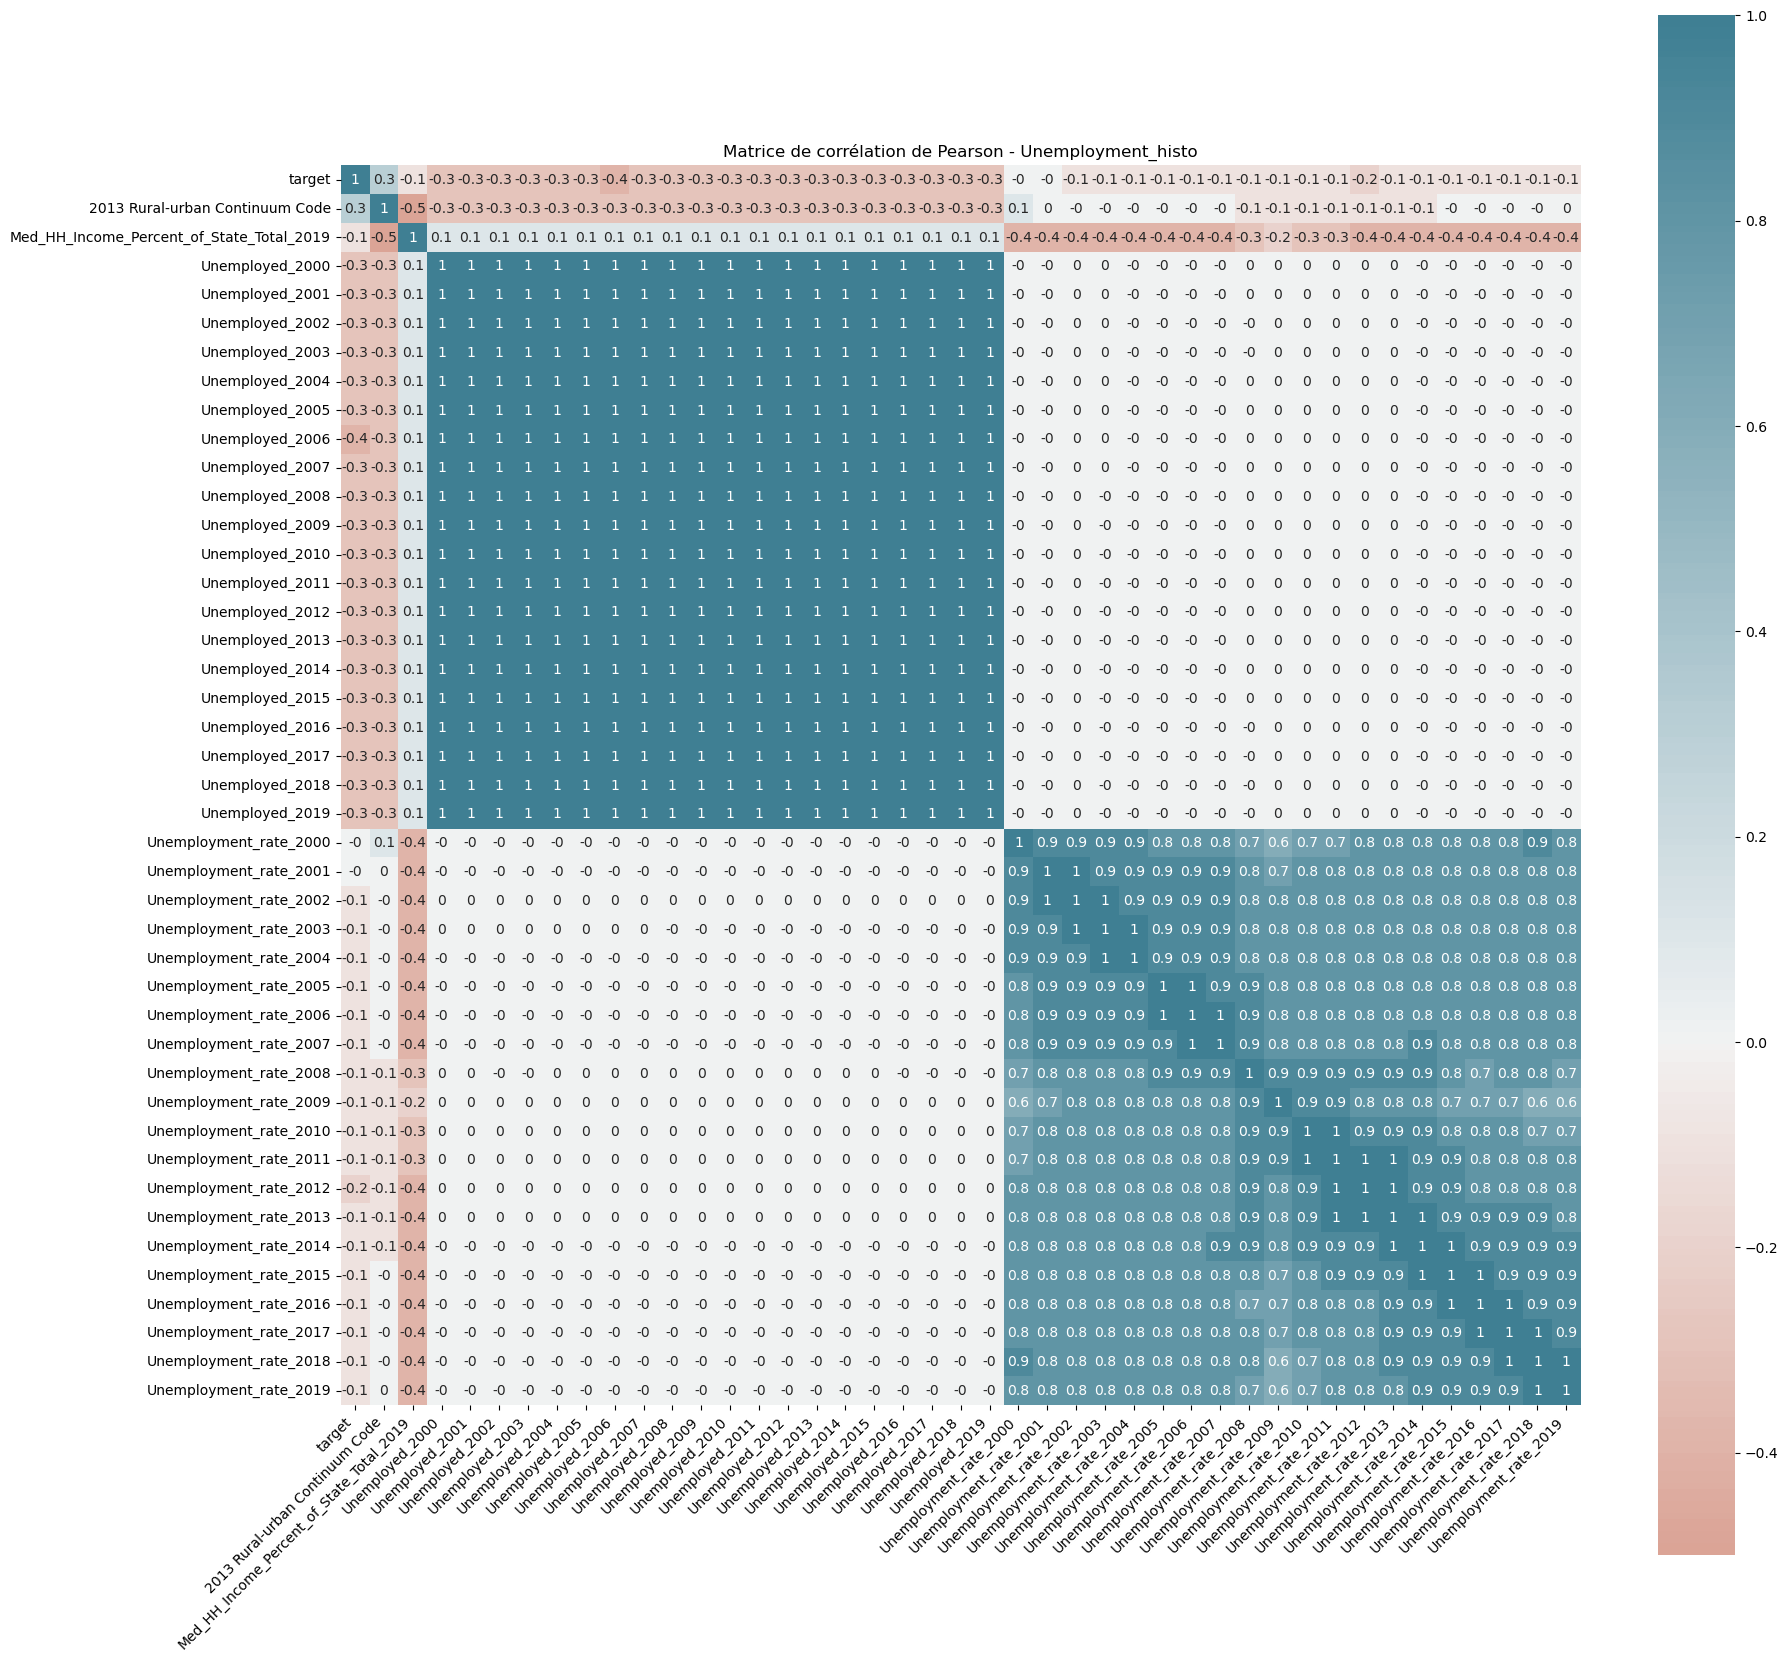

In [75]:
# Matrice de corrélation de Pearson : fichier unemployment - données historique 2000 à 2019

matrice_corr = df[["target","2013 Rural-urban Continuum Code","Med_HH_Income_Percent_of_State_Total_2019","Unemployed_2000","Unemployed_2001","Unemployed_2002","Unemployed_2003","Unemployed_2004","Unemployed_2005","Unemployed_2006","Unemployed_2007","Unemployed_2008","Unemployed_2009","Unemployed_2010","Unemployed_2011","Unemployed_2012","Unemployed_2013","Unemployed_2014","Unemployed_2015","Unemployed_2016","Unemployed_2017","Unemployed_2018","Unemployed_2019","Unemployment_rate_2000","Unemployment_rate_2001","Unemployment_rate_2002","Unemployment_rate_2003","Unemployment_rate_2004","Unemployment_rate_2005","Unemployment_rate_2006","Unemployment_rate_2007","Unemployment_rate_2008","Unemployment_rate_2009","Unemployment_rate_2010","Unemployment_rate_2011","Unemployment_rate_2012","Unemployment_rate_2013","Unemployment_rate_2014","Unemployment_rate_2015","Unemployment_rate_2016","Unemployment_rate_2017","Unemployment_rate_2018","Unemployment_rate_2019"]].corr().round(1)
plt.figure(figsize=(20,20))
ax = sns.heatmap(data=matrice_corr, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True,annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.title("Matrice de corrélation de Pearson - Unemployment_histo")

Les données historiques pour la variable "Unemployed" sont totalement corrélées. De même, les données d'historique pour "Unemployment_rate" sont très corrélées entre elles.<br>
Nous conservervons les valeurs les plus récentes pour modéliser (2019).

##### <span style="color:#191970">Données Population</span>

Text(0.5, 1.0, 'Matrice de corrélation de Pearson - Population_2019')

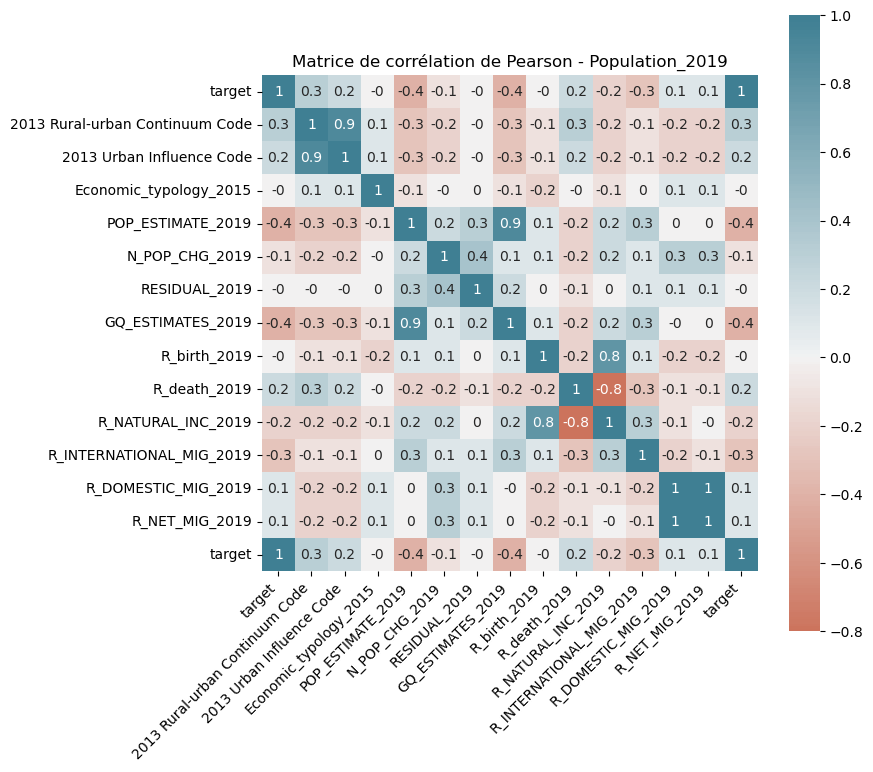

In [76]:
# Matrice de corrélation de Pearson : fichier Population - données 2019

matrice_corr = df_target_clean_train[['target', '2013 Rural-urban Continuum Code',"2013 Urban Influence Code",'Economic_typology_2015','POP_ESTIMATE_2019','N_POP_CHG_2019', 'RESIDUAL_2019', 'GQ_ESTIMATES_2019', 'R_birth_2019', 'R_death_2019', 'R_NATURAL_INC_2019', 'R_INTERNATIONAL_MIG_2019', 'R_DOMESTIC_MIG_2019', 'R_NET_MIG_2019', 'target']].corr().round(1)
plt.figure(figsize=(8,8))
ax = sns.heatmap(data=matrice_corr, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.title("Matrice de corrélation de Pearson - Population_2019")

Les variables "POP_ESTIMATE_2019" et "GQ_ESTIMATES_2019" sont très corrélées, nous conserverons la première.<br>
Les variables "R_birth_2019" et "R_death_2019" sont très corrélées à "R_NATURAL_INC_2019", nous garderons cette dernière.<br>
"R_DOMESTIC_MIG_2019" et "R_NET_MIG_2019" sont complètement corrélées, nous conserverons "R_NET_MIG_2019".<br>
Les variables "Economic_typology_2015" et "RESIDUAL_2019" n'ont aucun impact sur la target, elles seront supprimées.

Text(0.5, 1.0, 'Matrice de corrélation de Pearson - Population_histo')

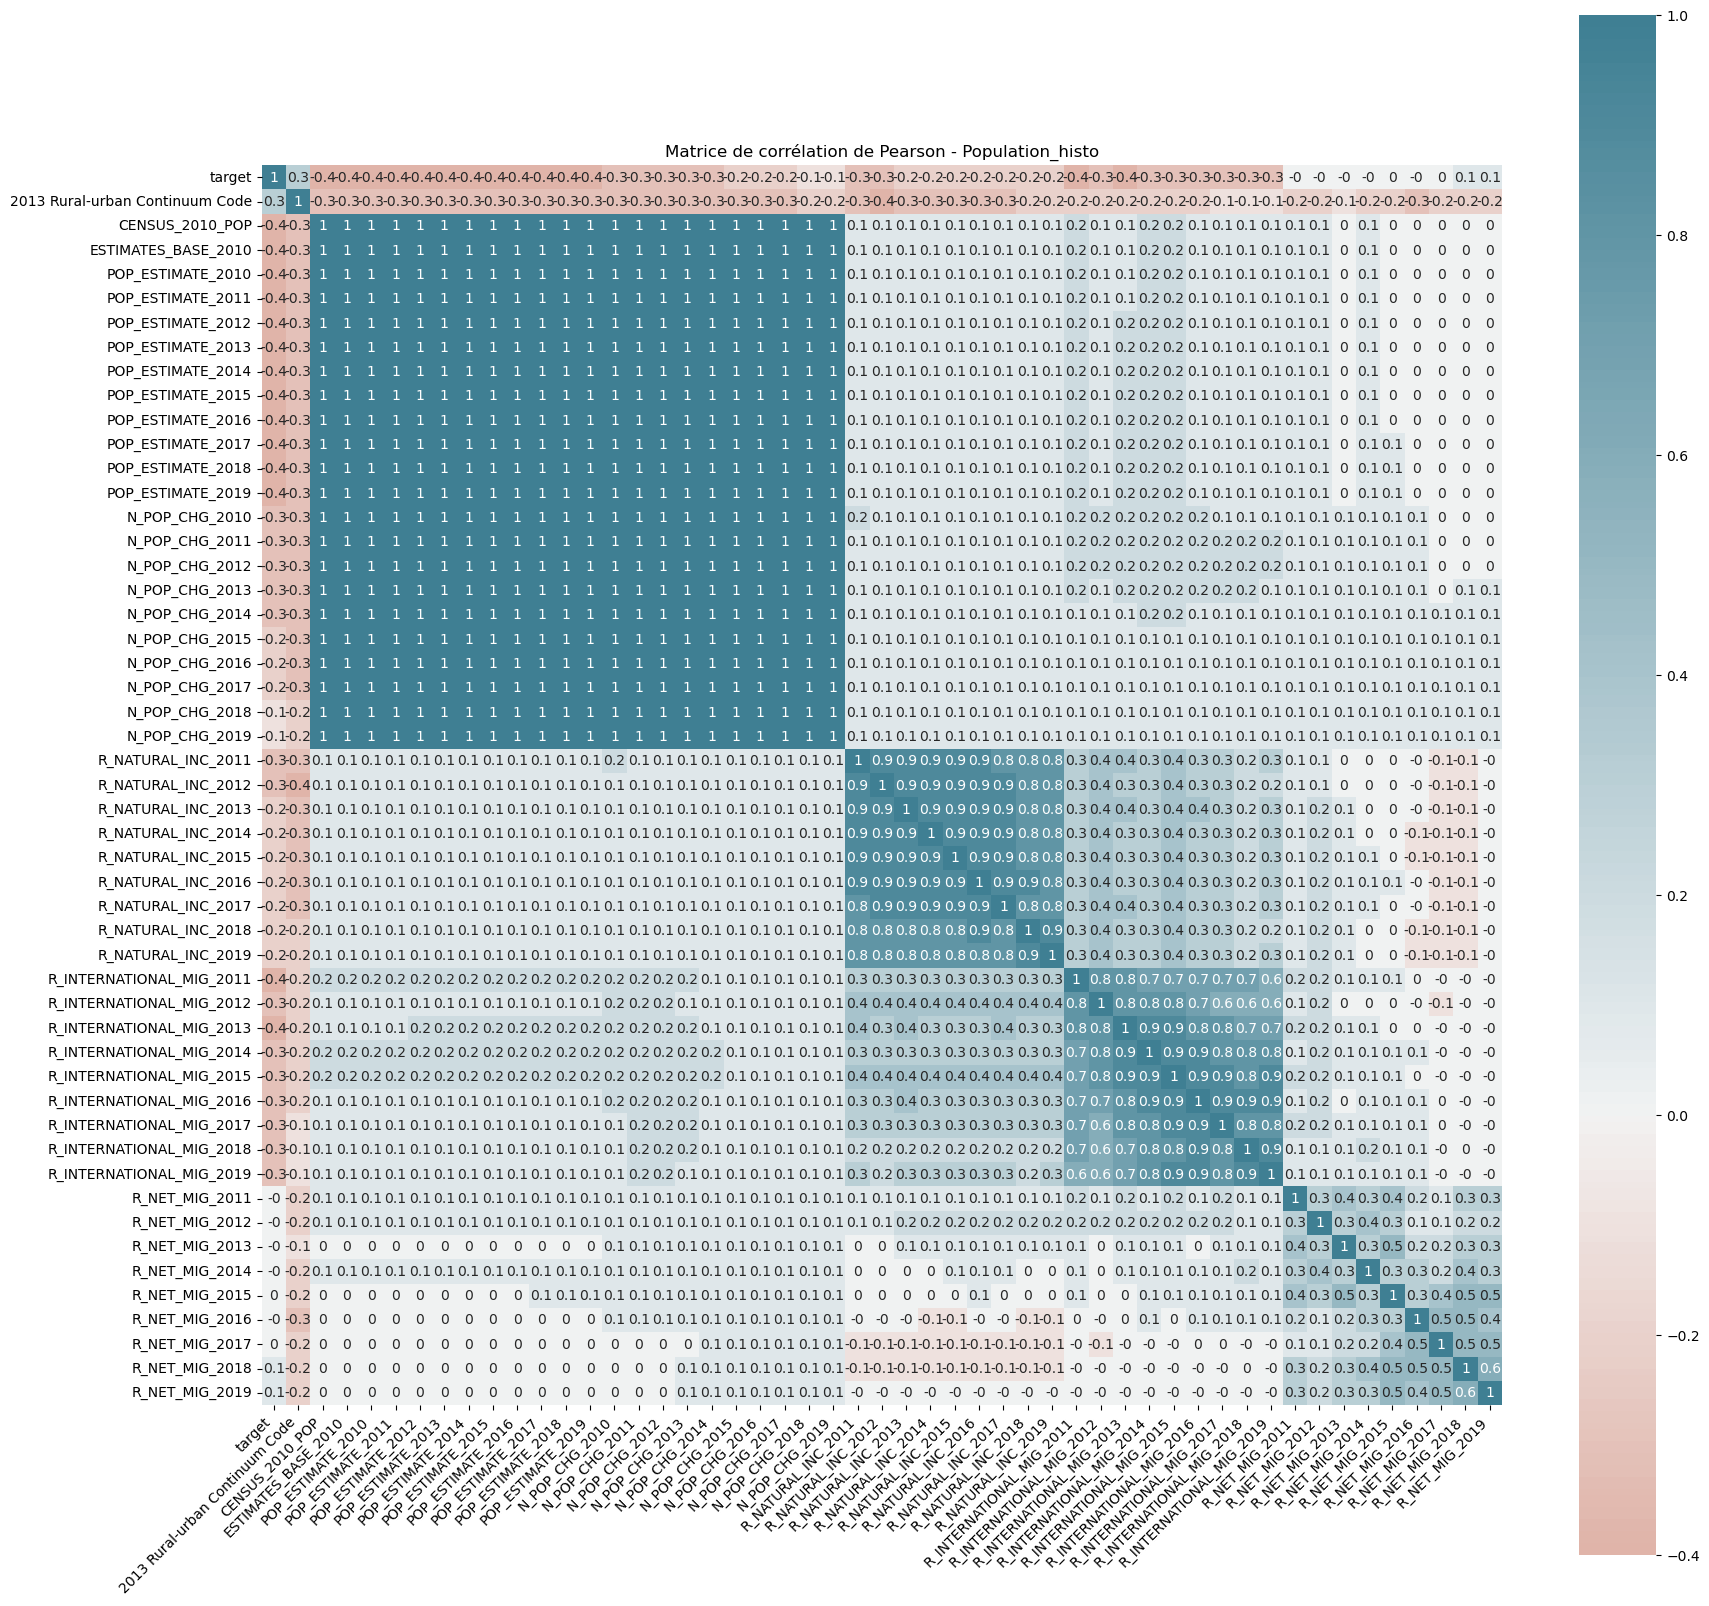

In [77]:
# Matrice de corrélation de Pearson : fichier population - historique 2010 à 2019

matrice_corr = df[["target","2013 Rural-urban Continuum Code","CENSUS_2010_POP","ESTIMATES_BASE_2010","POP_ESTIMATE_2010","POP_ESTIMATE_2011","POP_ESTIMATE_2012","POP_ESTIMATE_2013","POP_ESTIMATE_2014","POP_ESTIMATE_2015","POP_ESTIMATE_2016","POP_ESTIMATE_2017","POP_ESTIMATE_2018","POP_ESTIMATE_2019","N_POP_CHG_2010","N_POP_CHG_2011","N_POP_CHG_2012","N_POP_CHG_2013","N_POP_CHG_2014","N_POP_CHG_2015","N_POP_CHG_2016","N_POP_CHG_2017","N_POP_CHG_2018","N_POP_CHG_2019","R_NATURAL_INC_2011","R_NATURAL_INC_2012","R_NATURAL_INC_2013","R_NATURAL_INC_2014","R_NATURAL_INC_2015","R_NATURAL_INC_2016","R_NATURAL_INC_2017","R_NATURAL_INC_2018","R_NATURAL_INC_2019","R_INTERNATIONAL_MIG_2011","R_INTERNATIONAL_MIG_2012","R_INTERNATIONAL_MIG_2013","R_INTERNATIONAL_MIG_2014","R_INTERNATIONAL_MIG_2015","R_INTERNATIONAL_MIG_2016","R_INTERNATIONAL_MIG_2017","R_INTERNATIONAL_MIG_2018","R_INTERNATIONAL_MIG_2019","R_NET_MIG_2011","R_NET_MIG_2012","R_NET_MIG_2013","R_NET_MIG_2014","R_NET_MIG_2015","R_NET_MIG_2016","R_NET_MIG_2017","R_NET_MIG_2018","R_NET_MIG_2019"]].corr().round(1)
plt.figure(figsize=(20,20))
ax = sns.heatmap(data=matrice_corr, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True,annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.title("Matrice de corrélation de Pearson - Population_histo")

Toutes les données d'historique pour toutes les variables sont très corrélées entre elles.<br>
Nous conservervons donc les valeurs les plus récentes pour modéliser (2019).

##### <span style="color:#191970">Données totales retenues</span>

Récapitulatif des variables à conserver : <br>

**Global :** "target","2013 Rural-urban Continuum Code"<br>
**Fichier Education :** "Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19", <br>
**Fichier Poverty :** "PCTPOVALL_2019",<br>
**Fichier Unemployment :** "Unemployed_2019","Unemployment_rate_2019","Med_HH_Income_Percent_of_State_Total_2019",<br>
**Fichier population :** "POP_ESTIMATE_2019","N_POP_CHG_2019","R_NATURAL_INC_2019","R_INTERNATIONAL_MIG_2019","R_NET_MIG_2019"


Text(0.5, 1.0, 'Matrice de corrélation de Pearson : tous fichiers')

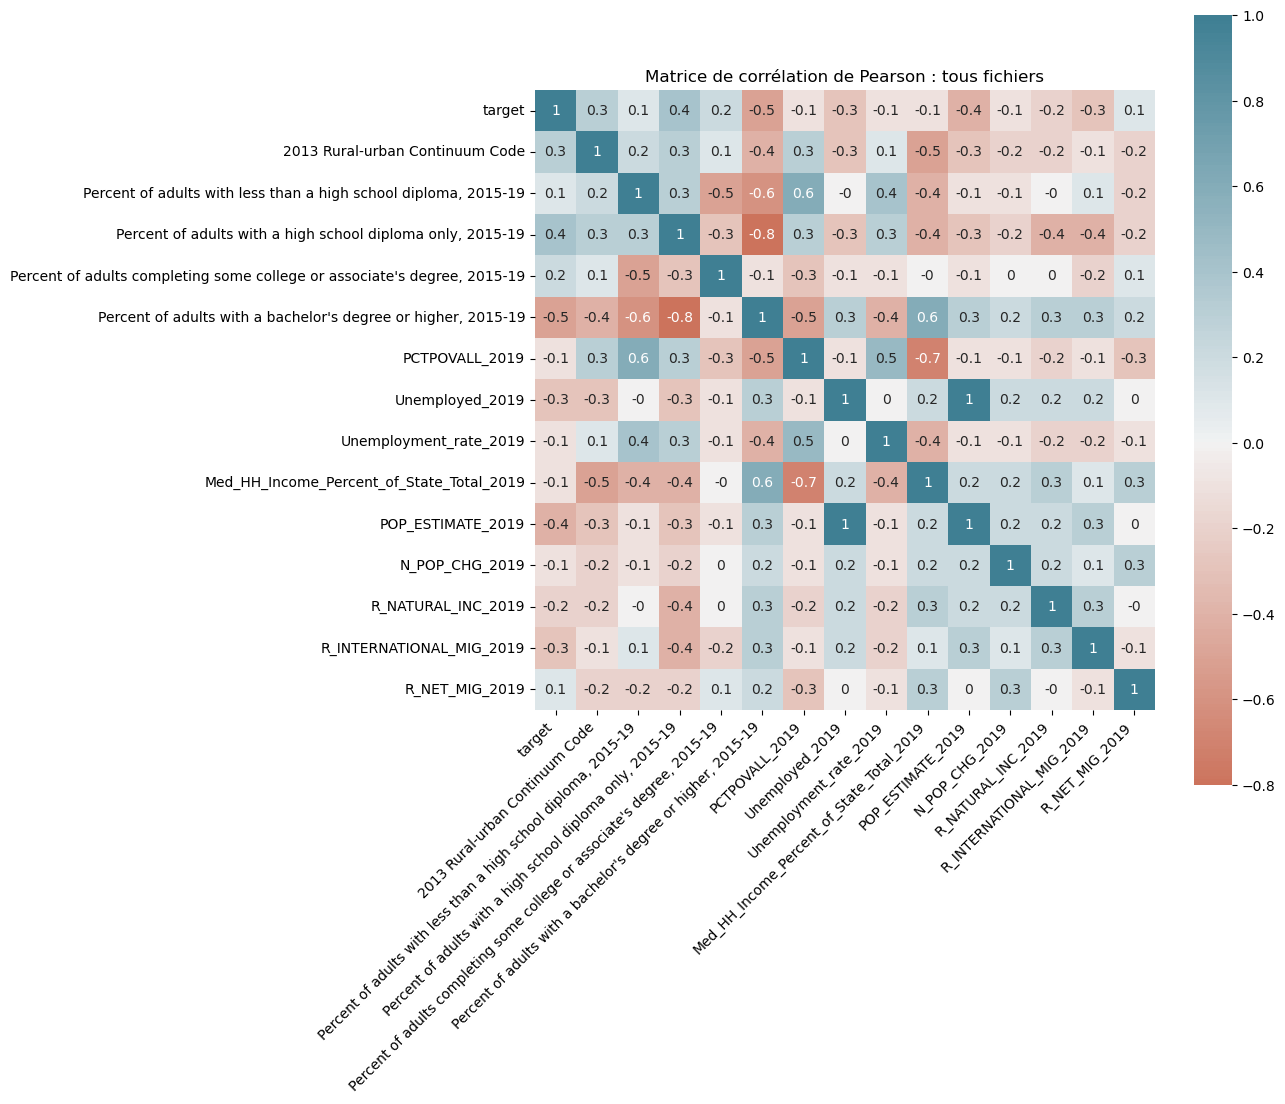

In [78]:
# Matrice de corrélation de Pearson : données totales retenues

matrice_corr = df_target_clean_train[['target', '2013 Rural-urban Continuum Code', "Percent of adults with less than a high school diploma, 2015-19", 'Percent of adults with a high school diploma only, 2015-19',"Percent of adults completing some college or associate's degree, 2015-19", "Percent of adults with a bachelor's degree or higher, 2015-19", "PCTPOVALL_2019", "Unemployed_2019", 'Unemployment_rate_2019', 'Med_HH_Income_Percent_of_State_Total_2019', 'POP_ESTIMATE_2019','N_POP_CHG_2019', 'R_NATURAL_INC_2019', 'R_INTERNATIONAL_MIG_2019', 'R_NET_MIG_2019']].corr().round(1)
plt.figure(figsize=(10,10))
ax = sns.heatmap(data=matrice_corr, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True,annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.title("Matrice de corrélation de Pearson : tous fichiers")

Il s'avère que la variable "Unemployed_2019" est corrélée à 1 avec la variable "POP_ESTIMATE_2019". Nous n'allons donc pas la conserver pour la modélisation.

#### <span style="color:#191970">Pairplot</span>

In [ ]:
# plairplot
g = sns.pairplot(df_target_clean_train, vars=['target', '2013 Rural-urban Continuum Code', "Percent of adults with less than a high school diploma, 2015-19", 'Percent of adults with a high school diploma only, 2015-19',"Percent of adults completing some college or associate's degree, 2015-19", "Percent of adults with a bachelor's degree or higher, 2015-19", "PCTPOVALL_2019", 'Unemployment_rate_2019', 'Med_HH_Income_Percent_of_State_Total_2019', 'POP_ESTIMATE_2019','N_POP_CHG_2019', 'R_NATURAL_INC_2019', 'R_INTERNATIONAL_MIG_2019', 'R_NET_MIG_2019'], hue="State_x")
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

#### <span style="color:#191970">Export CSV df final pour modélisation</span>

In [64]:
df_target_clean_train.columns

Index(['FIPS Code', 'State_x', 'Area name', '2013 Rural-urban Continuum Code',
       '2013 Urban Influence Code',
       'Percent of adults with less than a high school diploma, 2015-19',
       'Percent of adults with a high school diploma only, 2015-19',
       'Percent of adults completing some college or associate's degree, 2015-19',
       'Percent of adults with a bachelor's degree or higher, 2015-19',
       'PCTPOVALL_2019', 'CI90LBALLP_2019', 'CI90UBALLP_2019',
       'PCTPOV017_2019', 'CI90LB017P_2019', 'CI90UB017P_2019',
       'PCTPOV517_2019', 'CI90LB517P_2019', 'CI90UB517P_2019',
       'CI90LBINC_2019', 'CI90UBINC_2019', 'Metro_2013',
       'Civilian_labor_force_2019', 'Employed_2019', 'Unemployed_2019',
       'Unemployment_rate_2019', 'Median_Household_Income_2019',
       'Med_HH_Income_Percent_of_State_Total_2019', 'Economic_typology_2015',
       'POP_ESTIMATE_2019', 'N_POP_CHG_2019', 'RESIDUAL_2019',
       'GQ_ESTIMATES_2019', 'R_birth_2019', 'R_death_2019',
   

In [65]:
# Dataframe final avec variables retenues pour la modélisation

df_target_clean_drop = ['2013 Urban Influence Code', 'CI90LBALLP_2019', 'CI90UBALLP_2019', 'PCTPOV017_2019', 'CI90LB017P_2019', 'CI90UB017P_2019','PCTPOV517_2019', 'CI90LB517P_2019', 
                        'CI90UB517P_2019', 'CI90LBINC_2019', 'CI90UBINC_2019', 'Metro_2013', 'Civilian_labor_force_2019', 'Employed_2019', 'Unemployed_2019', 'Median_Household_Income_2019', 
                        'Economic_typology_2015','RESIDUAL_2019', 'GQ_ESTIMATES_2019', 'R_birth_2019', 'R_death_2019','R_DOMESTIC_MIG_2019']

df_train_prepro = df_target_clean_train.drop(columns=df_target_clean_drop, axis=1)

In [66]:
df_train_prepro.columns

Index(['FIPS Code', 'State_x', 'Area name', '2013 Rural-urban Continuum Code',
       'Percent of adults with less than a high school diploma, 2015-19',
       'Percent of adults with a high school diploma only, 2015-19',
       'Percent of adults completing some college or associate's degree, 2015-19',
       'Percent of adults with a bachelor's degree or higher, 2015-19',
       'PCTPOVALL_2019', 'Unemployment_rate_2019',
       'Med_HH_Income_Percent_of_State_Total_2019', 'POP_ESTIMATE_2019',
       'N_POP_CHG_2019', 'R_NATURAL_INC_2019', 'R_INTERNATIONAL_MIG_2019',
       'R_NET_MIG_2019', 'target'],
      dtype='object')

In [67]:
df_train_prepro.to_csv('./df_train_prepro.csv', index=False)

Partie Modélisation dans un deuxième notebook 